# Women&Children First

## Table of Contents
1. [**Introduction**](#1)
    - Objective/Purpose
    - Key Questions Addressed
    - Assumptions/Methodology/Scope
    - Leaderboard Observation
    - Project Objective Clarification
    - Conclusion
2. [**Acquiring and Loading Data**](#2)
	- Acquiring Data
    - Loading Data
    - Basic Data Exploration
    - Conclusion
3. [**Data Preprocessing**](#3)
    - Dropping out-of-scope columns
    - Feature Engineering / Transformation to obtain the Title column from Name
    - Handling Missing Values in Age
    - Drop Redundant Columns
    - Passenger Group Categorization and Refinement: Preprocessing for Survival Analysis
    - Survival Analysis by Title and Age Groups
    - Visualization of Survival Rates by Title Categories and Ages
    - Conclusion

  
4. [**Analysis of Passenger Categories**](#4)
   
   
   - Exploring "passenger Titles"
   - Consolidating Passenger Categories: "Women and Children" for Enhanced Analysis
 
   - Quantitative Validation of Evacuation Prioritization

   - Results Explanation
   - Conclusion

5. [**Conclusion**](#5)
    - Conclusion
    - Insights
    - Possible next steps
 

---

# 1


# Chapter 1: Introduction

#### Project Description

This section aims to provide a concise yet comprehensive overview of the project's primary objectives and methods.

## Objective Clarification

The primary objective of this project is to conduct a meticulous exploration of the Titanic dataset. The core focus lies in empirically examining the historical principle of "women and children first" rather than creating a generic survival prediction model.

### Key Questions Addressed

- **Survival Rates of Women and Children:** Investigate and analyze survival rates among women and children to validate the widely discussed "women and children first" principle during the Titanic disaster.

- **Age Classification and Survival Chances:** Explore age-based distinctions to define 'children' during the Titanic disaster. Assess whether toddlers had a higher chance of survival compared to other children.


## Assumptions, Methodology, and Scope

### Assumptions in Historical Context

The assumptions underlying this study are deeply rooted in historical narratives surrounding the Titanic disaster. These assumptions encompass the existence and application of the "women and children first" protocol during the evacuation, a prevalent societal norm at that time. Additionally, historical records indicate that the definition of "children" during the Titanic era typically included individuals under the age of 14, establishing an age-based criterion for our analysis.

### Methodology Emphasis

The methodology employed in this research involves a multifaceted approach. Feature engineering plays a crucial role in the extraction of significant information from the 'Name' column, leading to the creation of categorical variables like 'Title' that shed light on the social status and potential prioritization of passengers. Additionally, the handling of missing data, particularly in the 'Age' column, involves a nuanced approach. Imputations based on titles and other features aid in maintaining data integrity for subsequent analysis.

Furthermore, the analysis extends beyond basic statistical measures. Utilizing logistic regression and hypothesis testing methods, this study aims to discern correlations and statistically significant patterns within the dataset. These regression models will quantify the impact of various categorical variables, especially titles like 'women', 'Non_priority', and 'children,' on survival probabilities, validating historical presumptions.

### Scope of Project

The exclusion of certain columns, such as 'Fare','Ticket','PCLASS','Cabin' and 'Embarked,' from the analysis is a strategic decision. Their limited relevance to the research objectives and their potential to introduce noise into the analysis justify their exclusion, allowing a more focused examination of pertinent variables.


## Leaderboard Observation and Data Description

Observing the leaderboard's trend displaying high accuracy rates, particularly with over 300 entries reporting 100% accuracy, raises pertinent concerns. Such trends may arise from external data sources or a marked instance of overfitting, demanding critical evaluation during analysis.

### Project Objective Clarification:

The project refrains from merely predicting general survival rates aboard the Titanic. Instead, it aims to rigorously scrutinize the famous adage "women and children first" through specific scenarios within the dataset.


### Conclusion

The preliminary investigation presented in this chapter sets the stage for a comprehensive exploration of the Titanic dataset. By examining survival rates among women, children of various age groups, and addressing historical assumptions, the subsequent chapters will delve deeper into these aspects to uncover insights into the disaster's dynamics.


---

# 2

# Chapter 2: Acquiring and Loading Data

## Acquiring Data
- **Library Import:** Importing essential libraries like Pandas, NumPy, Matplotlib, and Seaborn for data manipulation, visualization, and analysis.
- **Notebook Setup:** Configuring settings and preferences for visualizations and Pandas display options.


In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import table 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import string
import re 
from skimpy import skim, generate_test_data
plt.style.use('ggplot')


---
## Loading and Initial Exploration



In [4]:
# Data manipulation
import datetime
import pandas.api.types as ptypes
from skimpy import skim, clean_columns

# Visualizations
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.2f}'.format

# Visualization settings (preference)
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

-  **Data Loading:** Loading the Titanic dataset using Pandas from a CSV file to initiate our analysis.

- **Data Display:** Displaying the first few rows of the dataset and reordering columns for better visualization.


In [6]:
# # Load DataFrame
datacsv=pd.read_csv('train.csv')
df=datacsv

In [15]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


---
## Basic Data Exploration

In [6]:
# # Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

Rows count: 891
Columns count: 12


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [8]:
print (list(df.columns.values))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [16]:
#re arranging the columns to have our (feature vector + label) + as a preference
cols=list(df.columns.values)
df=df[[cols[0]]+cols[2:13]+[cols[1]]]


- **Specific Passenger Investigation:** A specific investigation into a passenger's details (Masabumi Hosono) to add historical context to the analysis.


In [30]:
# sad story about a survivor who was shamed by the press and goverment for his survival of the tragedy. 
# source: https://en.wikipedia.org/wiki/Masabumi_Hosono
shame = df['Name'].str.contains('Masabumi', case=False)
result = df[shame]
result



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
288,289,2,"Hosono, Mr. Masabumi",male,42.00,0,0,237798,13.00,NaN,S,1


### Check Data Types

In [10]:
# # Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check Missing Data

In [11]:
# # Print percentage of missing values
missing_percent = df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
  print(missing_percent[missing_percent > 0] * 100)
else:
  print('None')

---- Percentage of Missing Values (%) -----
Cabin      77.10
Age        19.87
Embarked    0.22
dtype: float64


- **Percentage of Missing Values:**

The 'Cabin' and 'Embarked' columns, with missing values of 77.10% and 0.22%, respectively, lie outside the scope of our current investigation into 'women and children first.' As for the 'Age' column (19.87% missing), addressing these missing values is crucial for our forthcoming analysis related to age-based groupings and survival probabilities. 


#### Check for Duplicate Rows

In [12]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# # Show duplicated rows
df[df.duplicated()]

No. of entirely duplicated rows: 0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


#### Check Uniqueness of Data

In [13]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----',num_unique)
#print(100/num_unique)

---- Percentage Similarity of Values (%) ----- Sex              2
Survived         2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64




### Initial Observations and Next Steps
 **Data Quality Evaluation:** within our scope of project, only the Age column seem to have the most missing rows. the next chapters will attempt to remedy this issue by using feature engineering of the name and SibSP, Parch columns. 



---

# 3

# Chapter 3: Data Preprocessing



## Dropping Out-of-Scope Columns
This initial section focuses on refining the dataset by removing columns that are not pertinent to our primary research question. Columns such as 'Ticket,' 'Fare,' 'Cabin,' and 'Embarked' are deemed out-of-scope and hence dropped from the dataset. This process streamlines the dataset to only include relevant columns essential for our analysis.

In [46]:
# Dropping multiple out of scope columns at once
columns_to_drop = ['Ticket', 'Fare', 'Cabin', 'Embarked']
inscope_df = df.drop(columns=columns_to_drop).copy()


---
## Feature Engineering: Title Extraction and Age Grouping
The feature engineering section starts with extracting titles from the 'Name' column using predefined title lists. It creates a new 'Title' column in the dataset based on the titles extracted from passenger names. Additionally, the function `categorize_titles()` groups titles into specific categories like 'child,' 'mother,' and 'non-priority' based on predefined criteria.

In [47]:
# Function to extract titles from a big string
def substrings_in_string(big_string, substrings):#big is the name and sub is the titles within the name
    for substring in substrings:#for title in x
        if big_string.find(substring) != -1:
            return substring
    return np.nan


title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms',
              'Mlle', 'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer'] #the main titles that are present

# Map titles to the "Name" column
inscope_df['Title'] = inscope_df['Name'].apply(lambda x: substrings_in_string(x, title_list))
print(inscope_df)
# Function to replace titles
def categorize_titles(title):
    child = ["Master","Miss","Mlle"]
    mother = ["Mrs", "Mme"]
    
    if title in child :
        return "child"
    elif title in mother:
        return "mother"
    else:
        return "non_priority" 

# Apply the replace_titles function
inscope_df['Title'] = inscope_df['Title'].apply(lambda x: categorize_titles(x))

     PassengerId  Pclass                                                 Name  \
0              1       3                              Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)   
2              3       3                               Heikkinen, Miss. Laina   
3              4       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                             Allen, Mr. William Henry   
..           ...     ...                                                  ...   
886          887       2                                Montvila, Rev. Juozas   
887          888       1                         Graham, Miss. Margaret Edith   
888          889       3             Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                                Behr, Mr. Karl Howell   
890          891       3                                  Dooley, Mr. Patrick   

        Sex   Age  SibSp  P

---
## Passenger Group Categorization and Refinement

In the process of data preprocessing, we adopted an iterative approach, adjusting and validating our assumptions as we progressed. Initially, we categorized passengers based on their titles, creating distinct groups for 'non-priority,' 'mother,' 'child,' and 'woman.' We refined these groupings by correcting discrepancies found within specific categories. For instance, we reclassified single women aged 14 and above from the 'child' category to 'woman.' Additionally, we observed anomalies within the 'mother' category, where some individuals had no children or parents listed. We rectified this inconsistency by reassigning these cases to the 'woman' category. Moreover, travelers journeying alone, both males and females, were considered 'non-priority' and "woman" respectively.

This preprocessing step allowed us to define meaningful groups based on titles, setting the stage for subsequent analysis regarding survival rates among distinct passenger groups.








In [41]:
inscope_df["Title"].unique()

array(['non_priority', 'mother', 'child'], dtype=object)

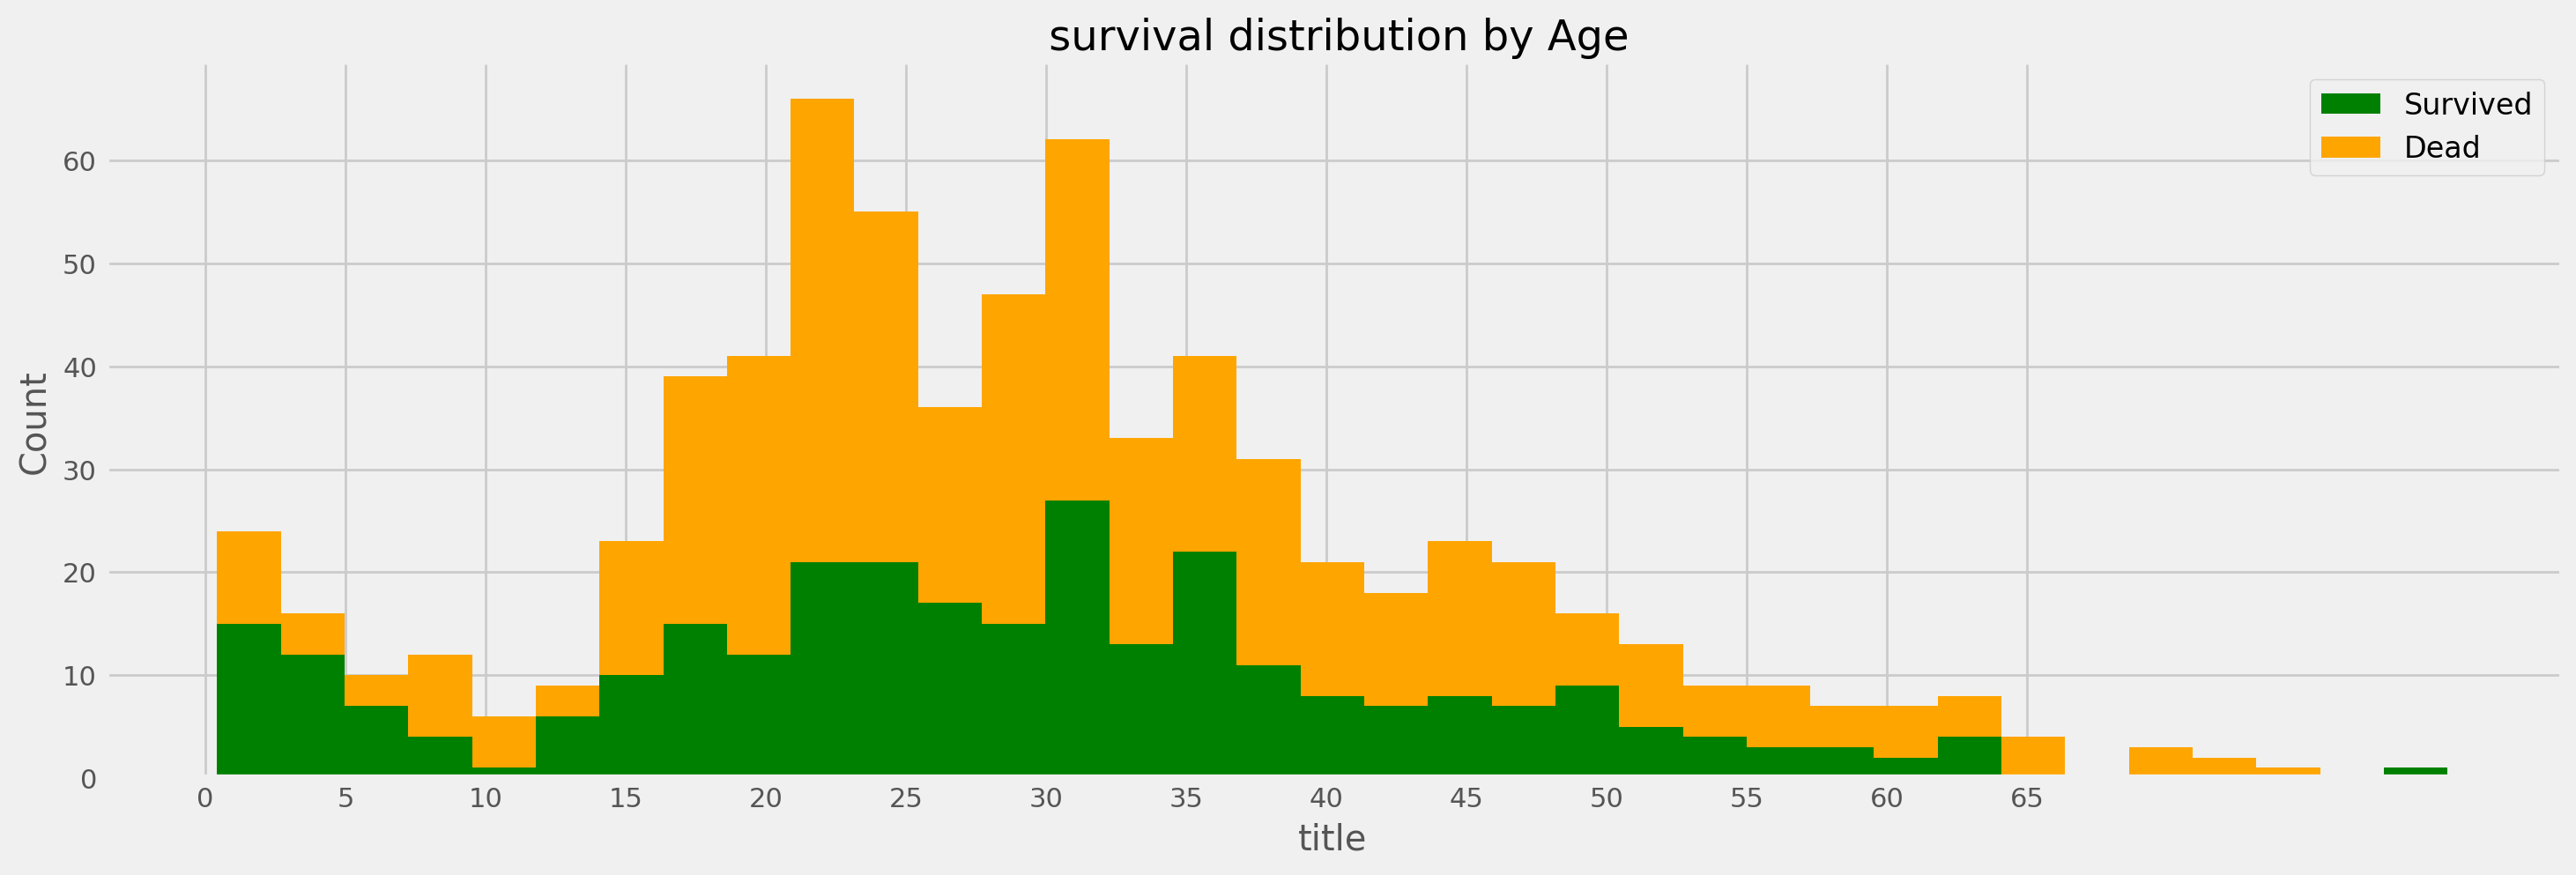

In [48]:
#histogram01  survival based on age
survived_passenger= inscope_df[(inscope_df['Survived'] == 1)]['Age']
deceased_passenger = inscope_df[(inscope_df['Survived'] == 0)]['Age']

plt.hist([survived_passenger,deceased_passenger], bins=35, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title(" survival distribution by Age")
plt.xticks(range(0,70,5))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()

In [75]:
inscope_df['Title'].unique()

array(['non_priority', 'woman', 'child', 'mother'], dtype=object)

In [49]:
#creating "woman" as a title for single women who are above  14 years old ()
inscope_df.loc[(~inscope_df['Age'].isnull()) & #no age
          (inscope_df['Sex'].str.contains('fem', flags=re.I, regex=True)) & #female
          (inscope_df['Title'] == 'child') & (inscope_df['Age'] > 13), 'Title'] = 'woman'#above 13 of age


In [28]:
#checking if there are any women that are under 14

inscope_df[(inscope_df['Title']=='woman')&(inscope_df['Age']<14)&(~inscope_df['Age'].isnull())]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title


In [29]:
#some "mothers" have 0 children or parents

inscope_df[(inscope_df['Title']=='mother')&(inscope_df['Parch']==0)&(~inscope_df['Age'].isnull())]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,1,mother
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,1,mother
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,1,mother
15,16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,1,mother
18,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31.00,1,0,0,mother
40,41,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,0,mother
41,42,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27.00,1,0,0,mother
49,50,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,0,mother
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,1,mother
53,54,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)",female,29.00,1,0,1,mother


In [50]:
#correcting the error of mothers with no children/parents
inscope_df.loc[(inscope_df['Title']=='mother')&(inscope_df['Parch']==0),'Title']='woman'
#checking if there are any mothers with no children?
inscope_df[(inscope_df['Title']=='mother')&(inscope_df['Parch']==0)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title


In [67]:
#Adding the toddler title
inscope_df.loc[(inscope_df['Title']=='child')
               &(inscope_df['Age']<5)
               ,'Title']='toddler'
#inscope_df[inscope_df['Title']=='toddler'] 

#### considering anyone traveling alone as an adult:



In [52]:

inscope_df.loc[(inscope_df['Parch']==0)&(inscope_df['SibSp']==0)&(inscope_df['Sex']=='female'),'Title']='woman'
inscope_df.loc[(inscope_df['Age']<14),'Title']='child'


In [53]:
inscope_df.loc[(inscope_df['Parch']==0)&(inscope_df['SibSp']>0)&(inscope_df['Sex']=='male'),'Title']='non_priority'

In [68]:
inscope_df[(inscope_df['Title']=='mother')]
inscope_df.groupby(['Title']).size()

Title
child            30
mother           56
non_priority    537
toddler          40
woman           210
dtype: int64

In [35]:
inscope_df[inscope_df['Title']=='mother'].sort_values(by='Age').head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Survived,Title
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,1,mother
608,609,2,"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",female,22.00,1,2,1,mother
323,324,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)",female,22.00,1,1,1,mother
858,859,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,1,mother
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,1,mother


In [56]:
# Dropping the remaining rows where 'Title' is 'child' and 'Age' column is null
inscope_df.drop(inscope_df[(inscope_df['Title'] == 'child') & (inscope_df['Age'].isnull())].index, inplace=True)


In [66]:
inscope_df["Title"].unique()


array(['non_priority', 'woman', 'child', 'mother'], dtype=object)

---
## Survival Analysis by Title and Age Groups
After refining the title categories, the analysis shifts towards exploring survival rates among different title groups based on age. Visualizations such as histograms and bar plots are used to display survival distributions, shedding light on how survival rates vary across different title categories and age ranges. These plots offer insights into potential prioritization trends in rescue efforts and survival dynamics across different age groups.

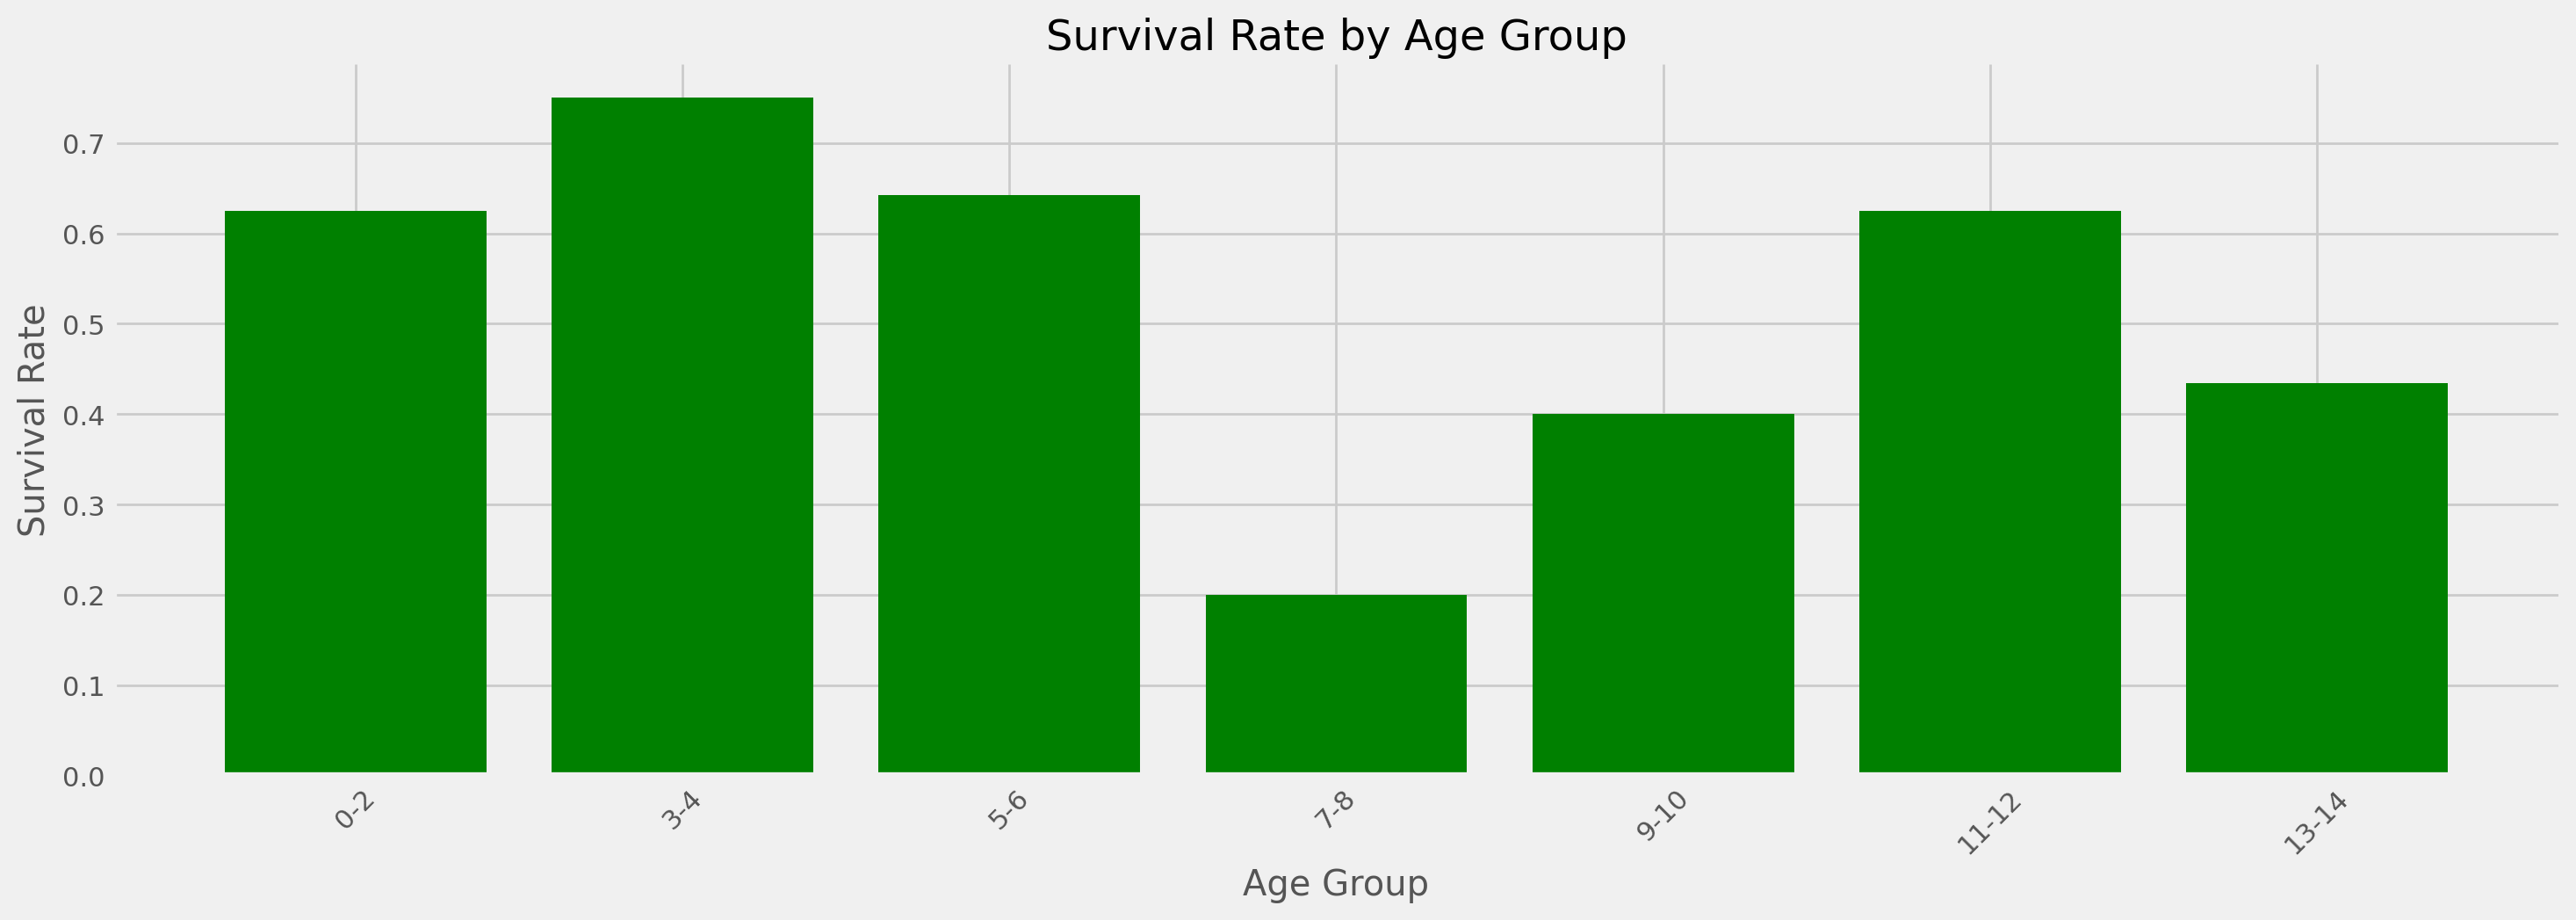

In [64]:

# Filter out missing values in 'Age' column
isccop=inscope_df.copy()
#isccop = isccop.dropna(subset=['Age'])

# Define age bins (only including children to teens)
age_bins = [0, 2, 4, 8, 10, 12, 14, 16]  # Define age groups as needed

# Create labels for the age bins
age_labels = ['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14']

# Cut the data into age bins and add a new column 'AgeGroup'
isccop['AgeGroup'] = pd.cut(isccop['Age'], bins=age_bins, labels=age_labels)

# Calculate survival rates within each age group
survival_rates = isccop.groupby('AgeGroup', observed=False)['Survived'].mean( )

# Plotting the survival rates
plt.bar(age_labels, survival_rates, color='green')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

In examining the revised age groupings, distinct patterns in survival rates emerge within specific age intervals. The delineated age brackets—'Toddler' (0-4), 5-6, and subsequently 9-10, 11-12, 13-14—reveal varying survival probabilities, showcasing intriguing disparities among different age clusters. Notably, the 'Toddler' group exhibits significantly higher survival rates, hinting at a potential prioritization trend in rescue efforts during critical moments for this young age cohort. Conversely, age ranges such as 5-6 and others depict alternative survival dynamics, marking transitions in survival tendencies across childhood. These findings not only emphasize the pivotal role of age in survival outcomes but also prompt a deeper exploration into the underlying factors influencing these distinctive patterns. In our forthcoming analysis, we aim to delve deeper into these refined age-specific trends, exploring complementary variables to unveil a more comprehensive understanding of the nuanced dynamics shaping survival probabilities during critical events.

Including a specific "Toddler" category (0-4) offers a more focused examination of the youngest passengers, potentially revealing more detailed insights into their survival outcomes and the actions taken during the disaster.

--- 


## Visualization of Survival Rates by Title Categories and Ages
In this step, we aim to visualize the survival and death counts within each title category against the corresponding ages. By plotting histograms, a barplot and a swarmplot, we'll explore the distribution of survivors and non-survivors across different age groups categorized by titles such as 'non_priority,' 'Women,' 'mother,' etc. This visualization will shed light on the survival patterns concerning specific age ranges within different title categories, allowing us to understand potential trends or correlations between age, title, and survival status among passengers aboard the Titanic.

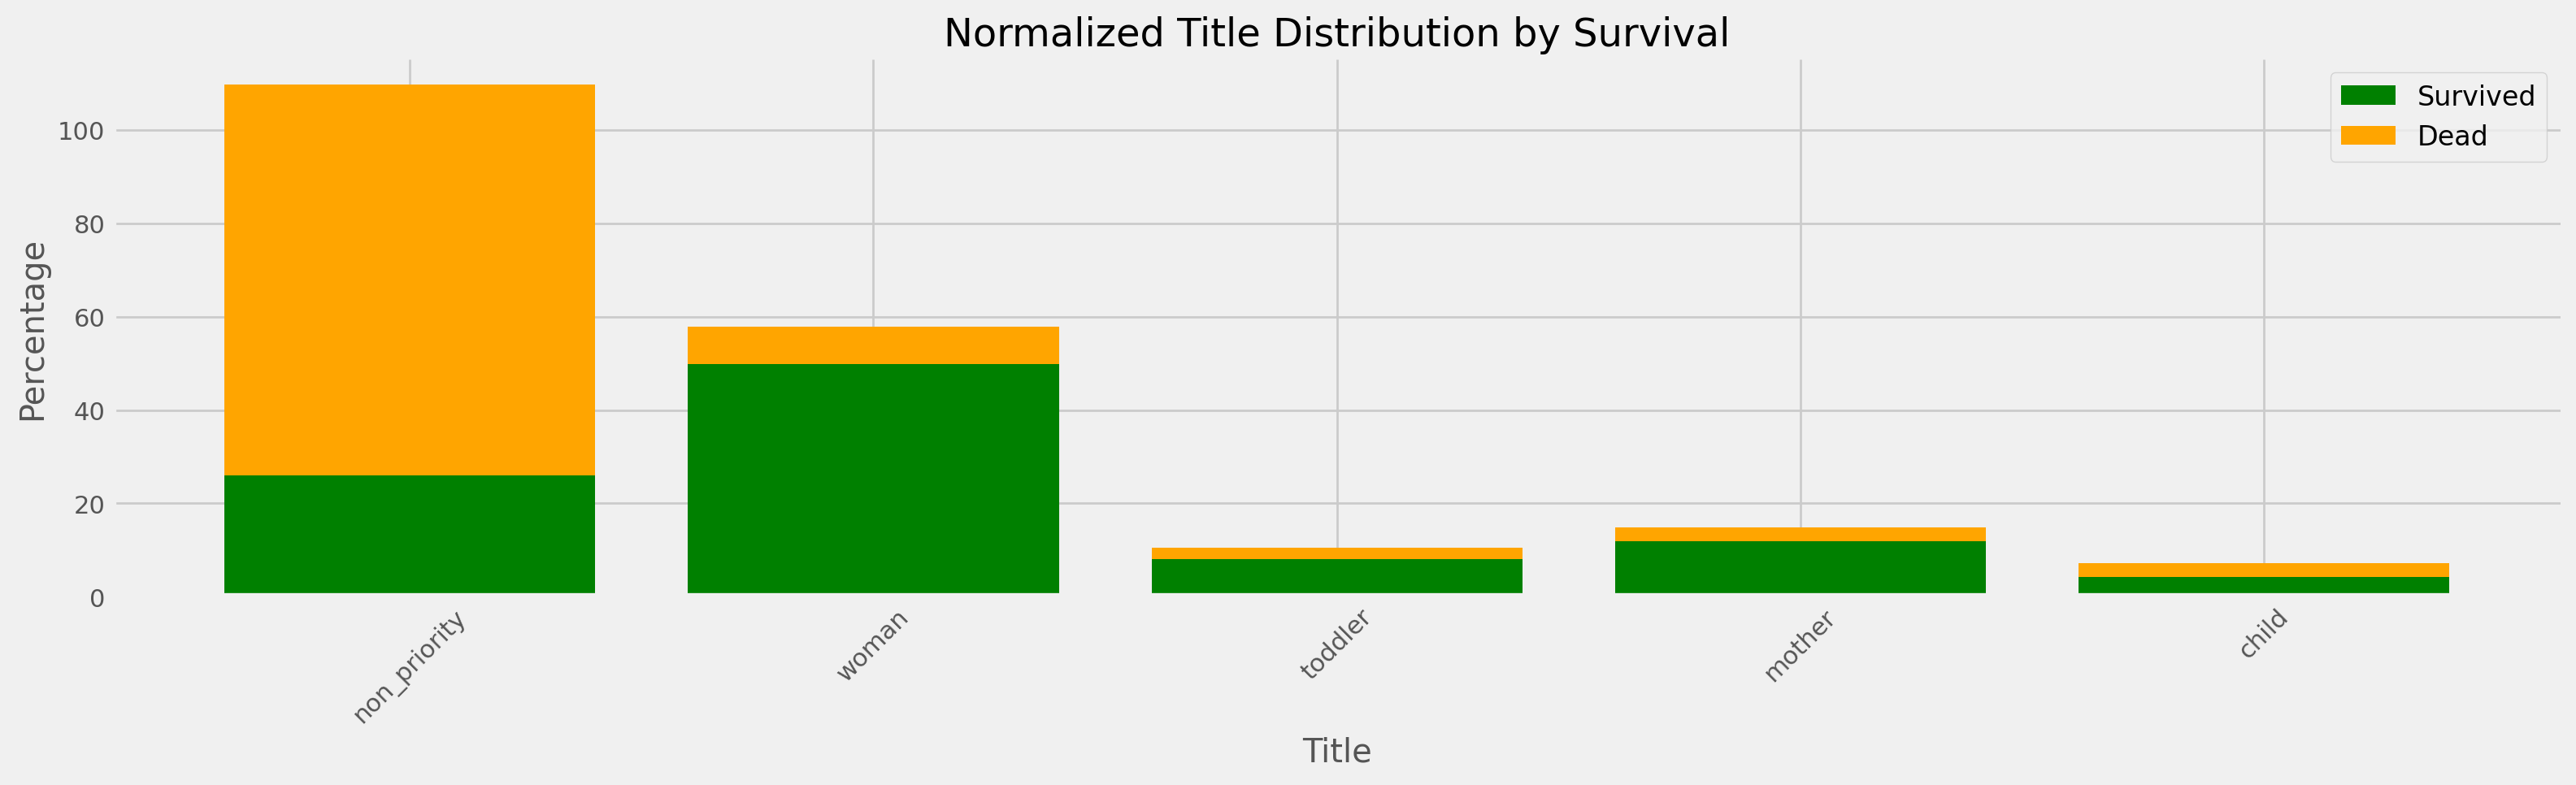

In [70]:


# Counting occurrences of each title for survived and deceased passengers
survived_titles_count = inscope_df[inscope_df['Survived'] == 1]['Title'].value_counts(normalize=True)
deceased_titles_count = inscope_df[inscope_df['Survived'] == 0]['Title'].value_counts(normalize=True)

# Getting a list of all unique titles
all_titles = inscope_df['Title'].unique()

# Creating lists to hold survival and death percentages for each title
survived_percentages = [survived_titles_count.get(title, 0) * 100 for title in all_titles]
deceased_percentages = [deceased_titles_count.get(title, 0) * 100 for title in all_titles]

# Plotting normalized histogram of survival rates based on 'Title'
plt.bar(all_titles, survived_percentages, color='green',  label='Survived')
plt.bar(all_titles, deceased_percentages, color='orange',  label='Dead', bottom=survived_percentages)
plt.title("Normalized Title Distribution by Survival")
plt.xlabel("Title")
plt.ylabel("Percentage")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/user1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


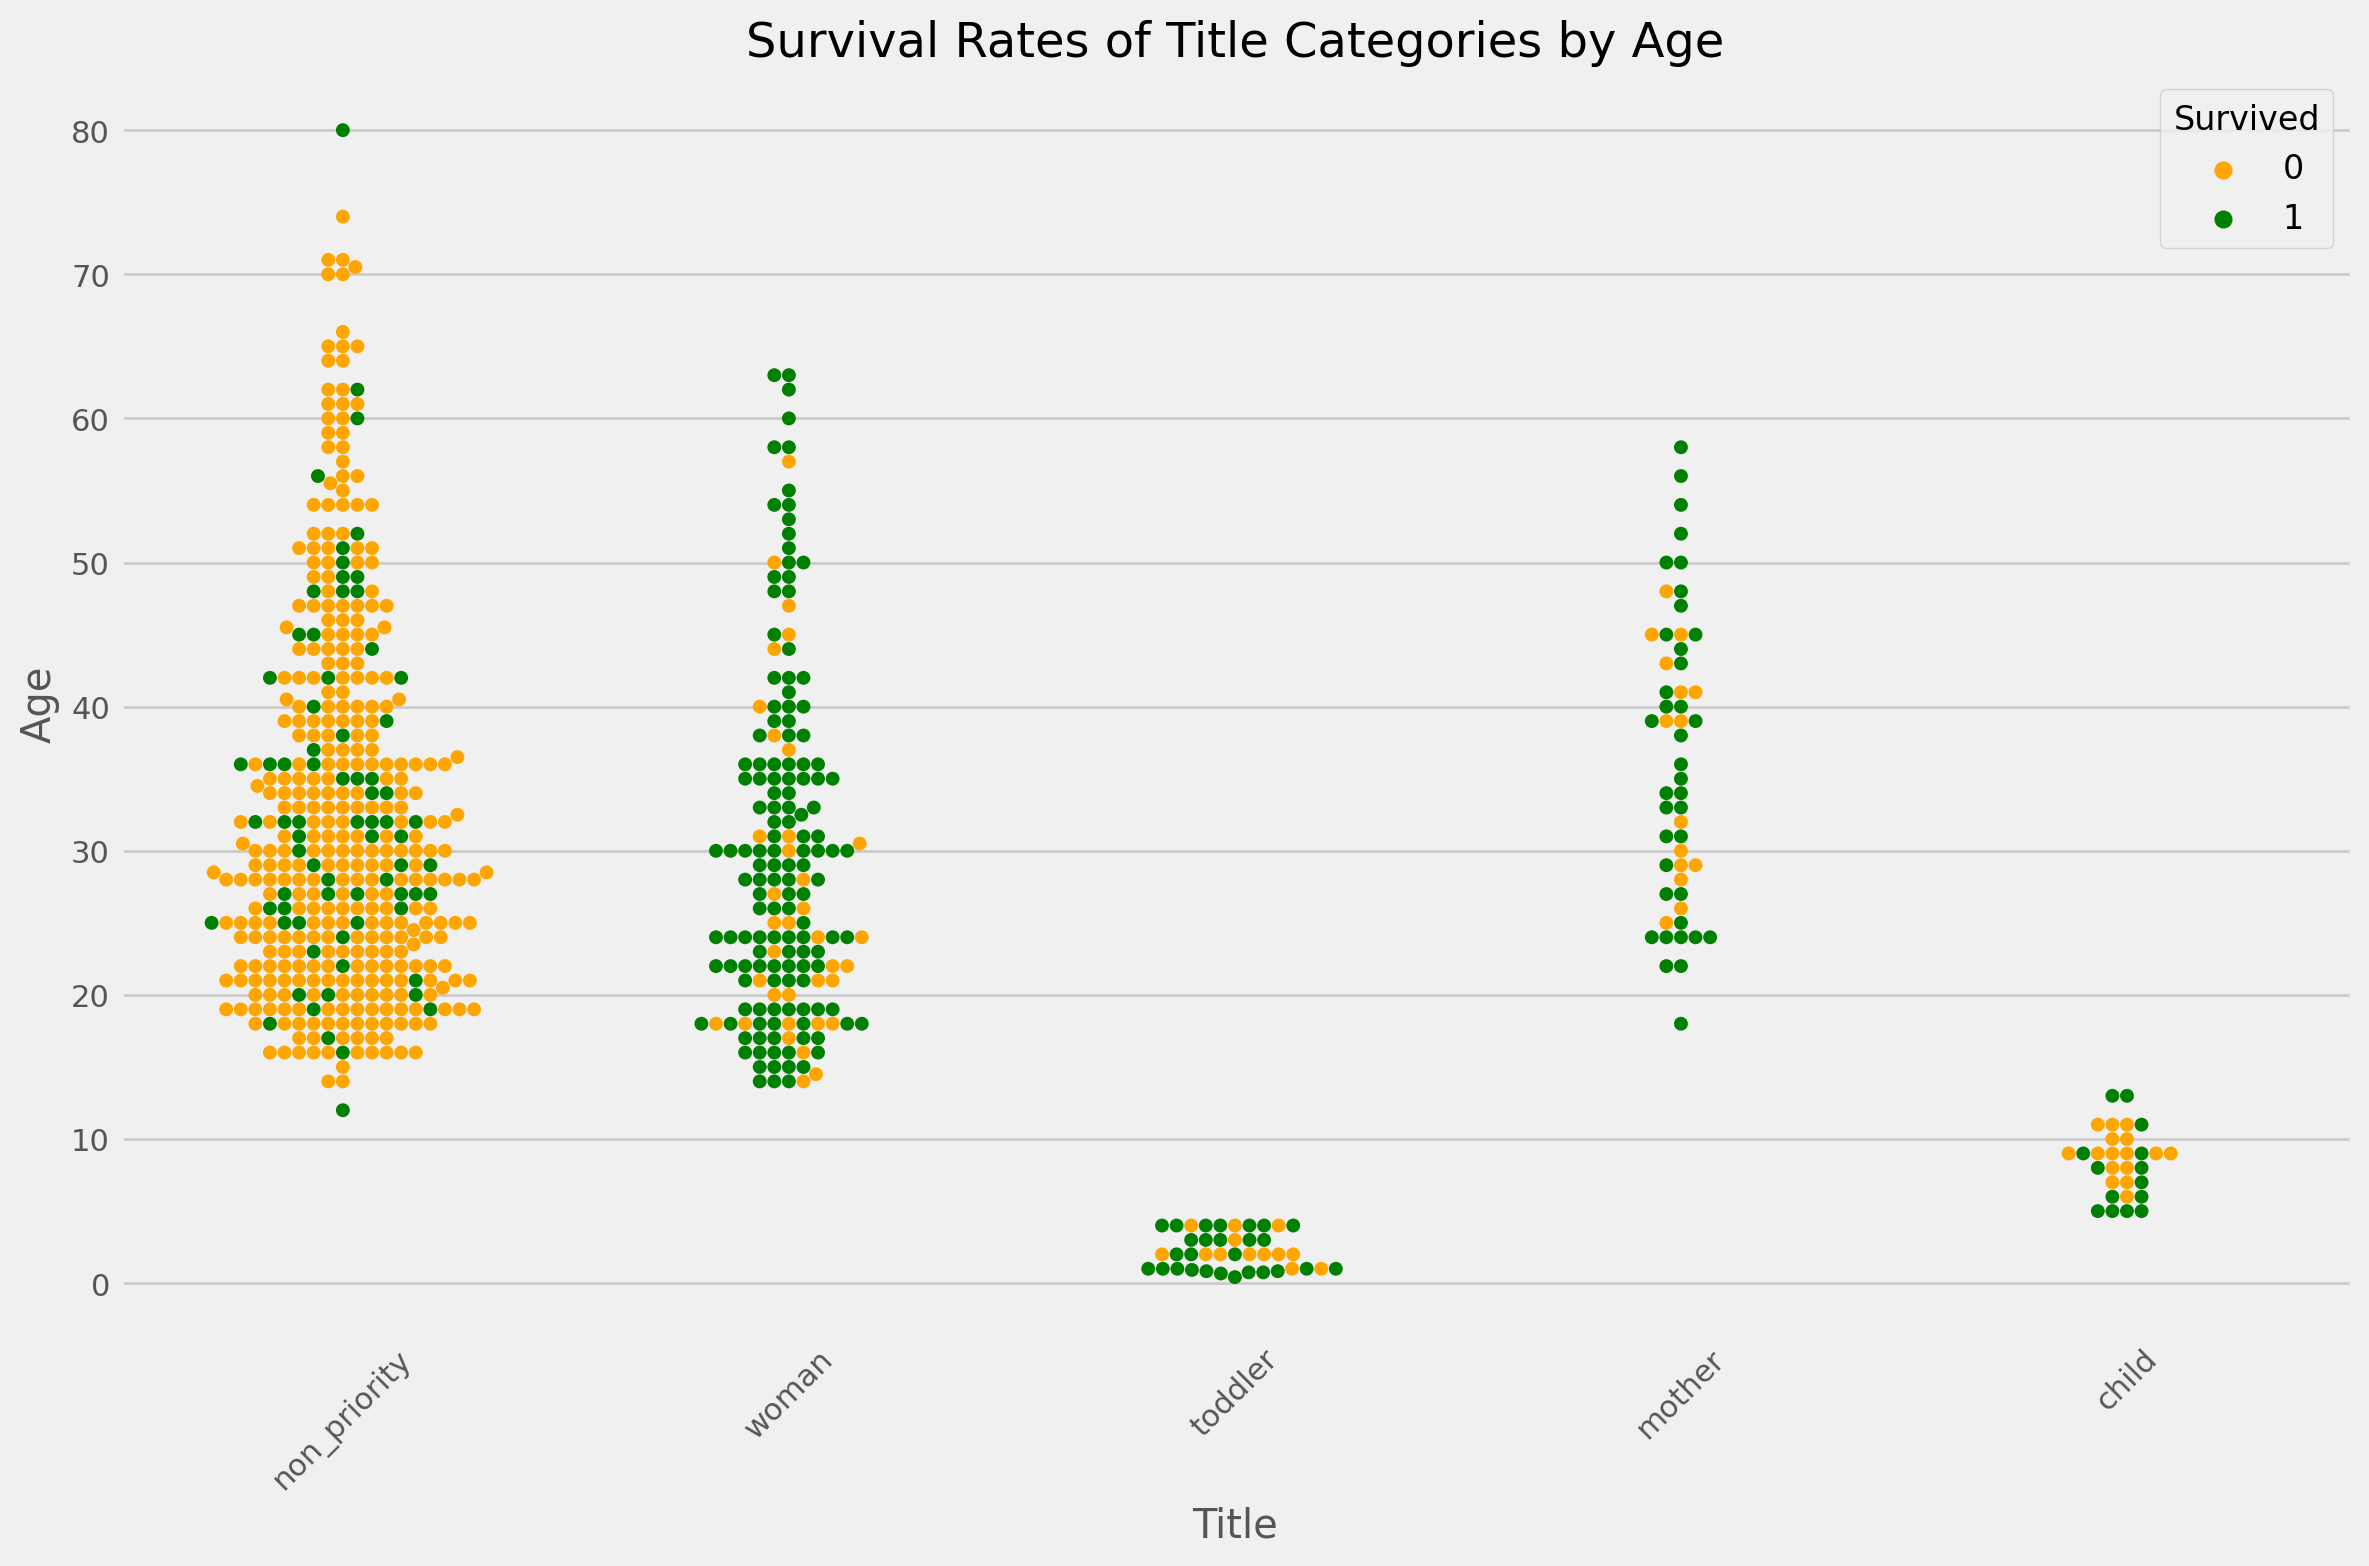

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {1: 'green', 0: 'orange'}  # Specify colors for each category
# Creating a swarm plot to visualize survival rates of different title categories by age
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Title', y='Age', hue='Survived', data=inscope_df, palette=custom_palette)
plt.title('Survival Rates of Title Categories by Age')
plt.xlabel('Title')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observations:


- **Non-Priority Category:** The concentration of deceased passengers within the prime working-age range (20-35) might indicate the challenging survival circumstances for individuals not prioritized during the evacuation.
- **Woman Category:** The higher survival rate for young women might reflect the adherence to the "women and children first" principle.
- **Toddler Category:** High survival rates among toddlers align with the priority given to young children during the evacuation.
- **Mother Category:** The absence of deaths among older passengers classified as mothers may suggest their prioritization or protective roles.
- **Child Category:** The transition from green to red and back to green might signify varying survival rates among different age ranges within the child category. which might indicates which types of children were prioritized first.


---
### histograms of titles based on Age
Let's proceed by generating histograms that illustrate the distribution of survival outcomes for passengers belonging to different titles categorized by age groups. This analysis will aid in uncovering any notable trends in survival rates among women, children, mothers, and other groups based on their ages during the Titanic disaster.



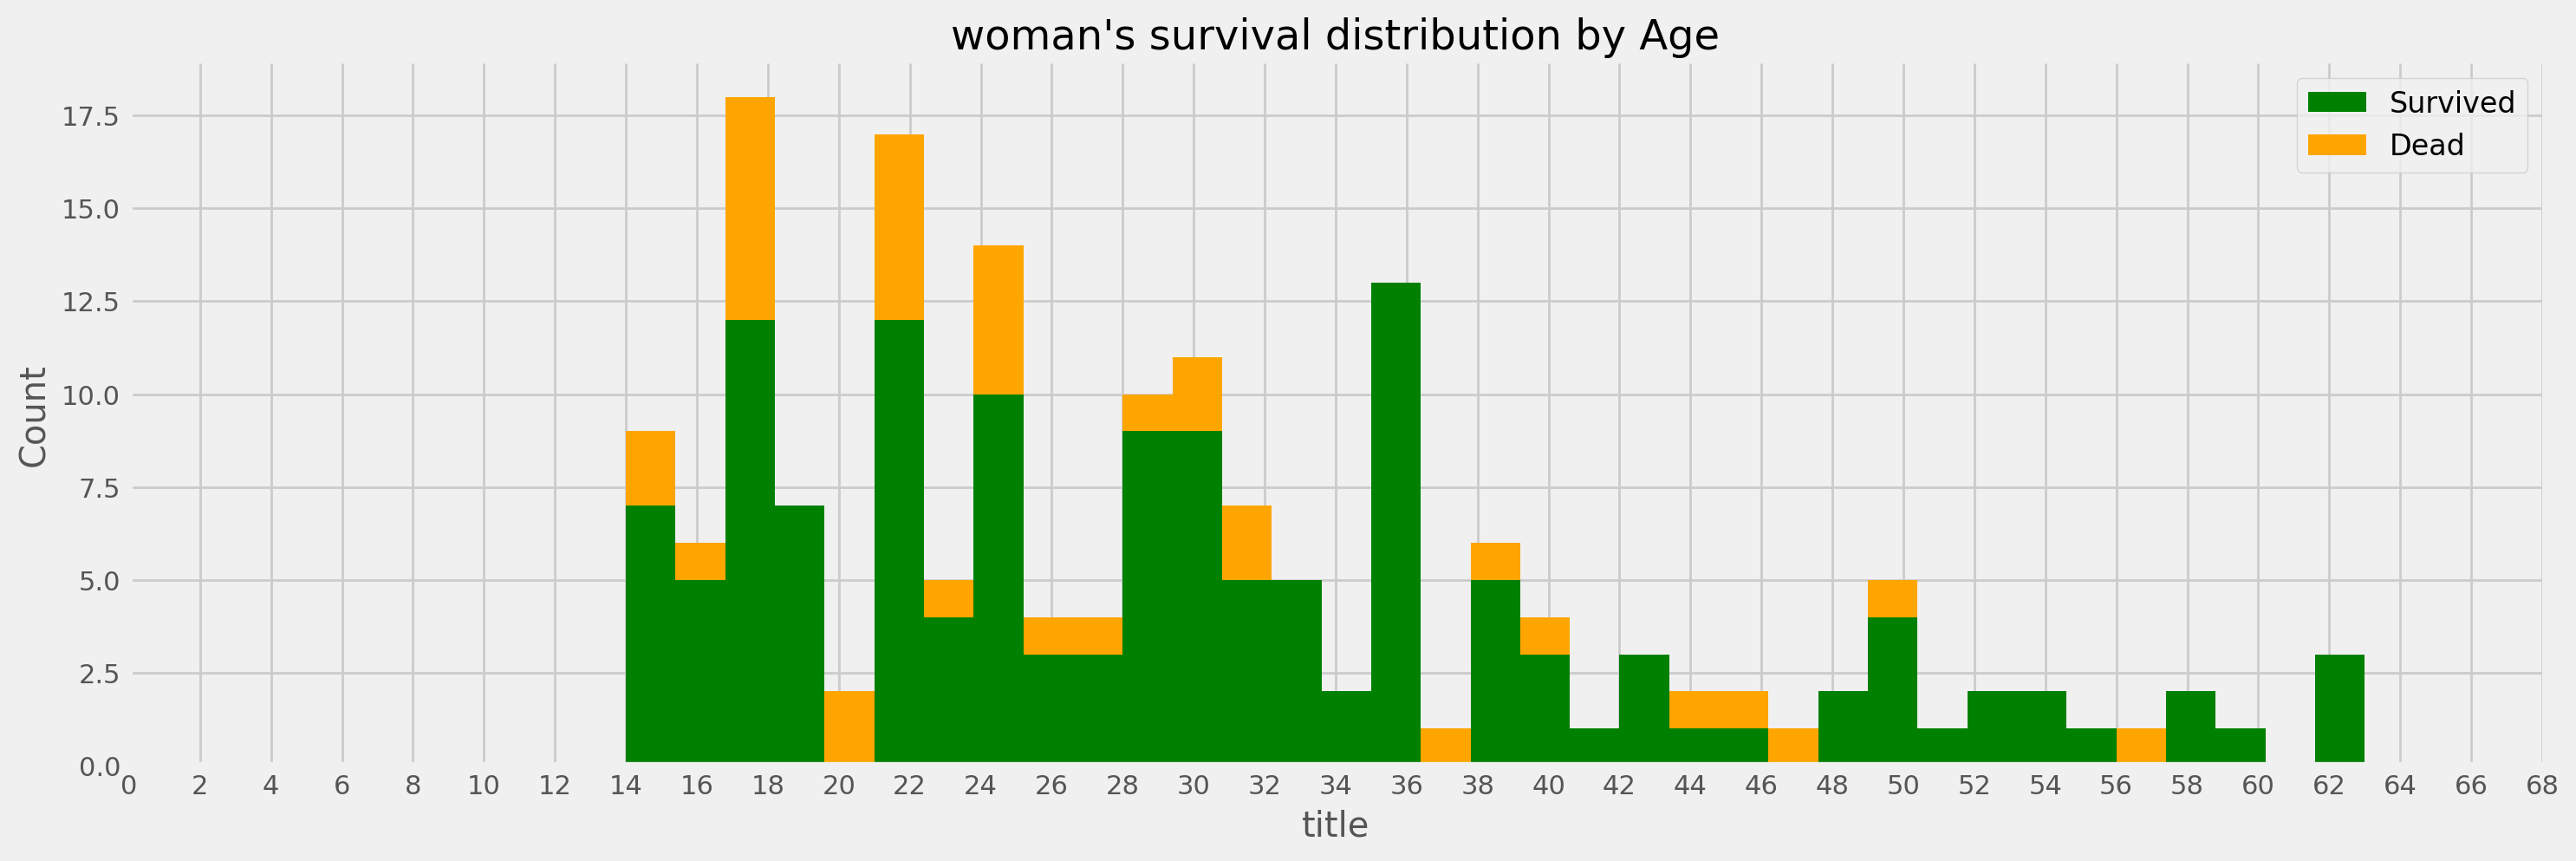

In [122]:
#histogram01: women's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'woman')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'woman')]['Age']

plt.hist([survived_women,deceased_women], bins=35, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("woman's survival distribution by Age")
plt.xticks(range(0,70,2))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()

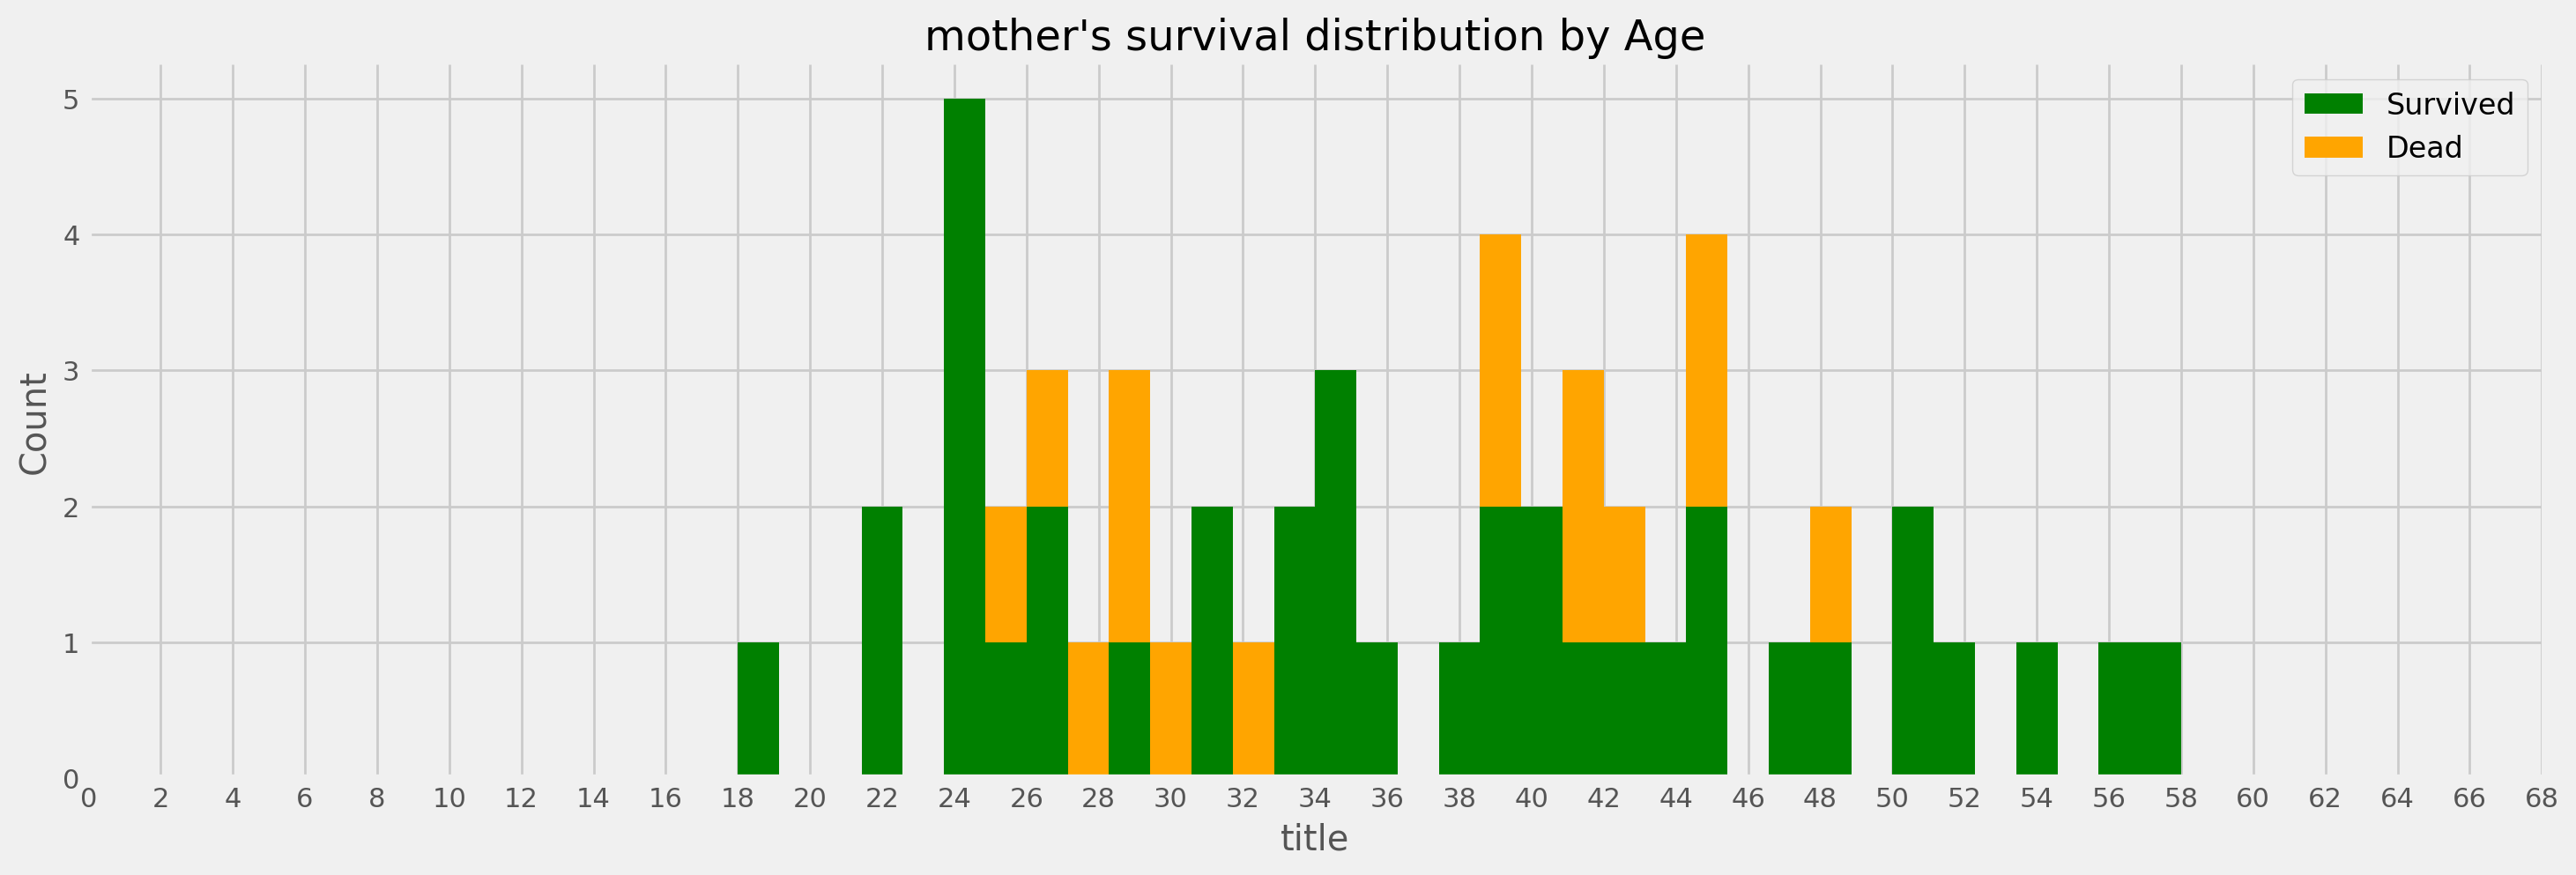

In [127]:
#histogram02: Mother's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'mother')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'mother')]['Age']

plt.hist([survived_women,deceased_women], bins=35, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("mother's survival distribution by Age")
plt.xticks(range(0,70,2))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()


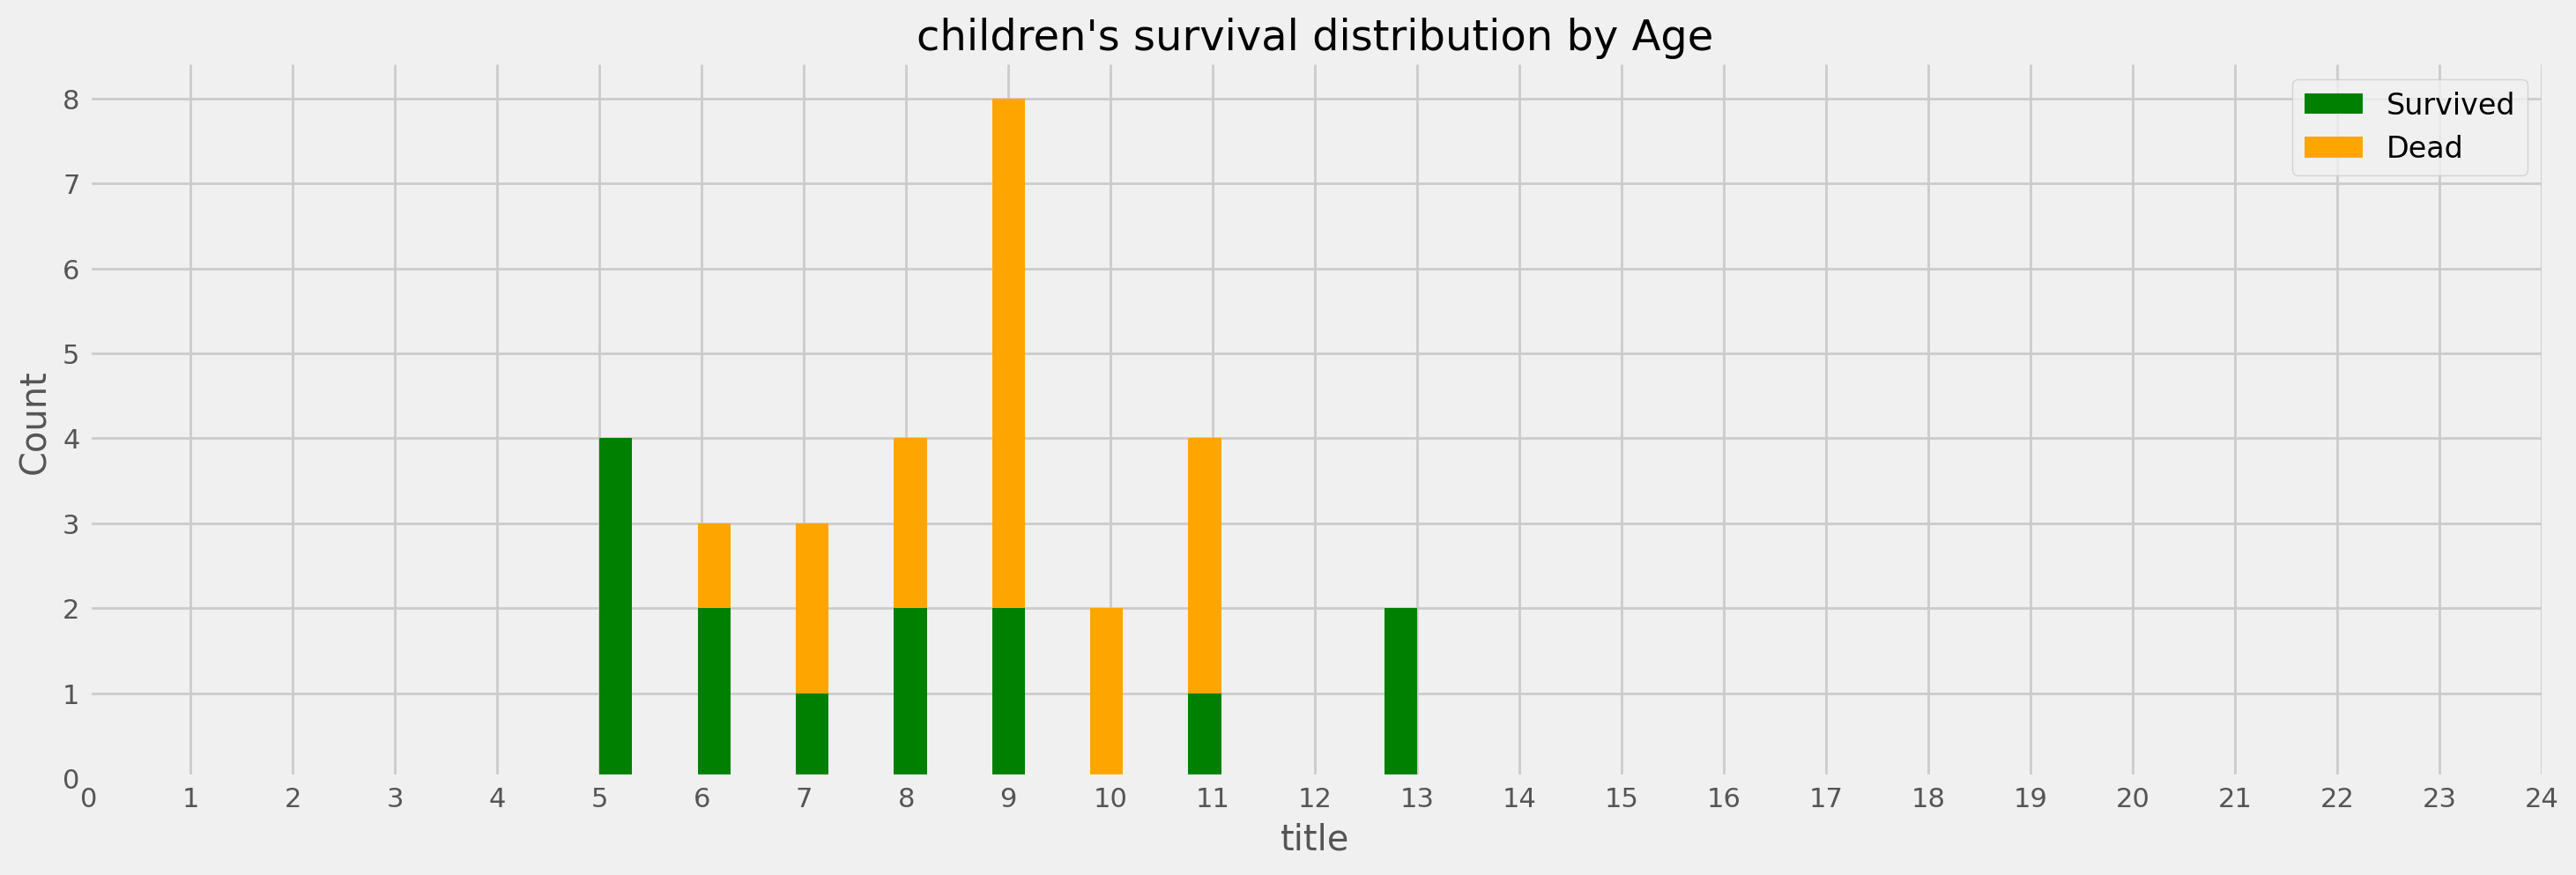

In [79]:
#histogram03: Children's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'child')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'child')]['Age']

plt.hist([survived_women,deceased_women], bins=25, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("children's survival distribution by Age")
plt.xticks(range(0,25,1))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()

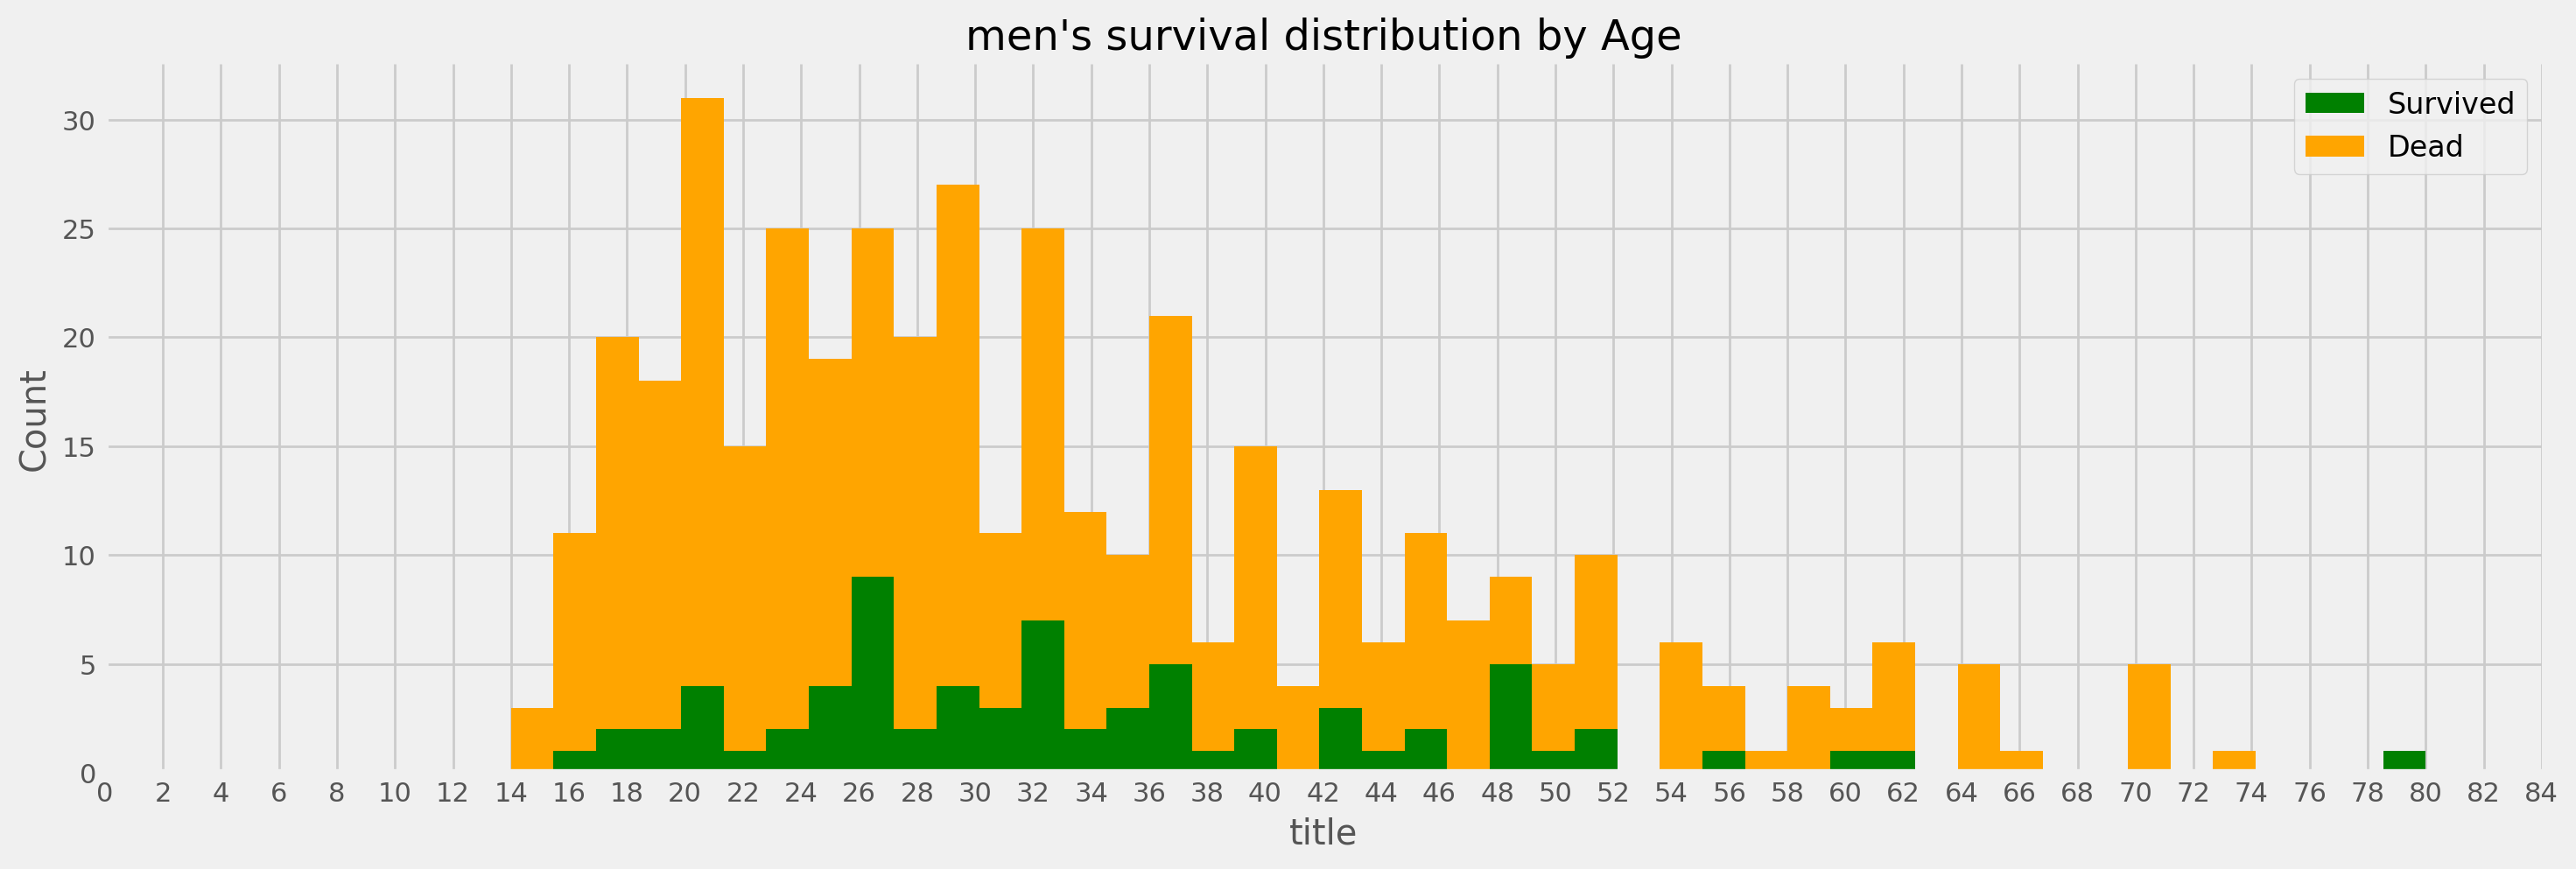

In [139]:
#histogram04: men's survival based on age
survived_women = inscope_df[(inscope_df['Survived'] == 1) & (inscope_df['Title'] == 'non_priority')]['Age']
deceased_women = inscope_df[(inscope_df['Survived'] == 0) & (inscope_df['Title'] == 'non_priority')]['Age']

plt.hist([survived_women,deceased_women], bins=45, stacked=True,color=['green','orange'], label=['Survived', 'Dead'])
plt.title("men's survival distribution by Age")
plt.xticks(range(0,86,2))
plt.xlabel("title")
plt.ylabel("Count")
plt.legend()
plt.show()



### Initial Observations:

In the histograms depicting survival rates based on passenger titles across different age groups, notable peaks emerge, suggesting intriguing trends within each category.

- Mothers:The histogram representing survival rates among mothers exhibits a discernible peak around the age of 24.
- Women: For the category of women, the histogram displays a prominent spike in survival rates around the age of 36. 

- Men: Contrastingly, the histogram depicting survival rates among men demonstrates a peak around the age of 26. This concentration hints at a specific age range where men were comparatively more likely to survive. 

These observed peaks in survival rates at distinct age groups among different passenger categories provide valuable insights into potential age-related priorities or behaviors during the evacuation. Further analysis and correlation with other variables may elucidate the underlying reasons behind these trends, offering deeper context into the dynamics of survival on board.



 
## Conclusion
Chapter 3 predominantly focuses on refining the dataset by feature engineering, categorizing passengers based on titles and age groups, and exploring survival rates across these defined categories. This groundwork sets the stage for a more detailed analysis in subsequent chapters, allowing for deeper insights into the survival dynamics of distinct passenger groups aboard the Titanic.

--- 

# 4


# Chapter 4: Data Analysis

## Introduction

The section delves into exploring various passenger categories, survival proportions, and their implications regarding adherence to the "women and children first" principle during the Titanic disaster.

 
 

## Exploring `passenger Titles`


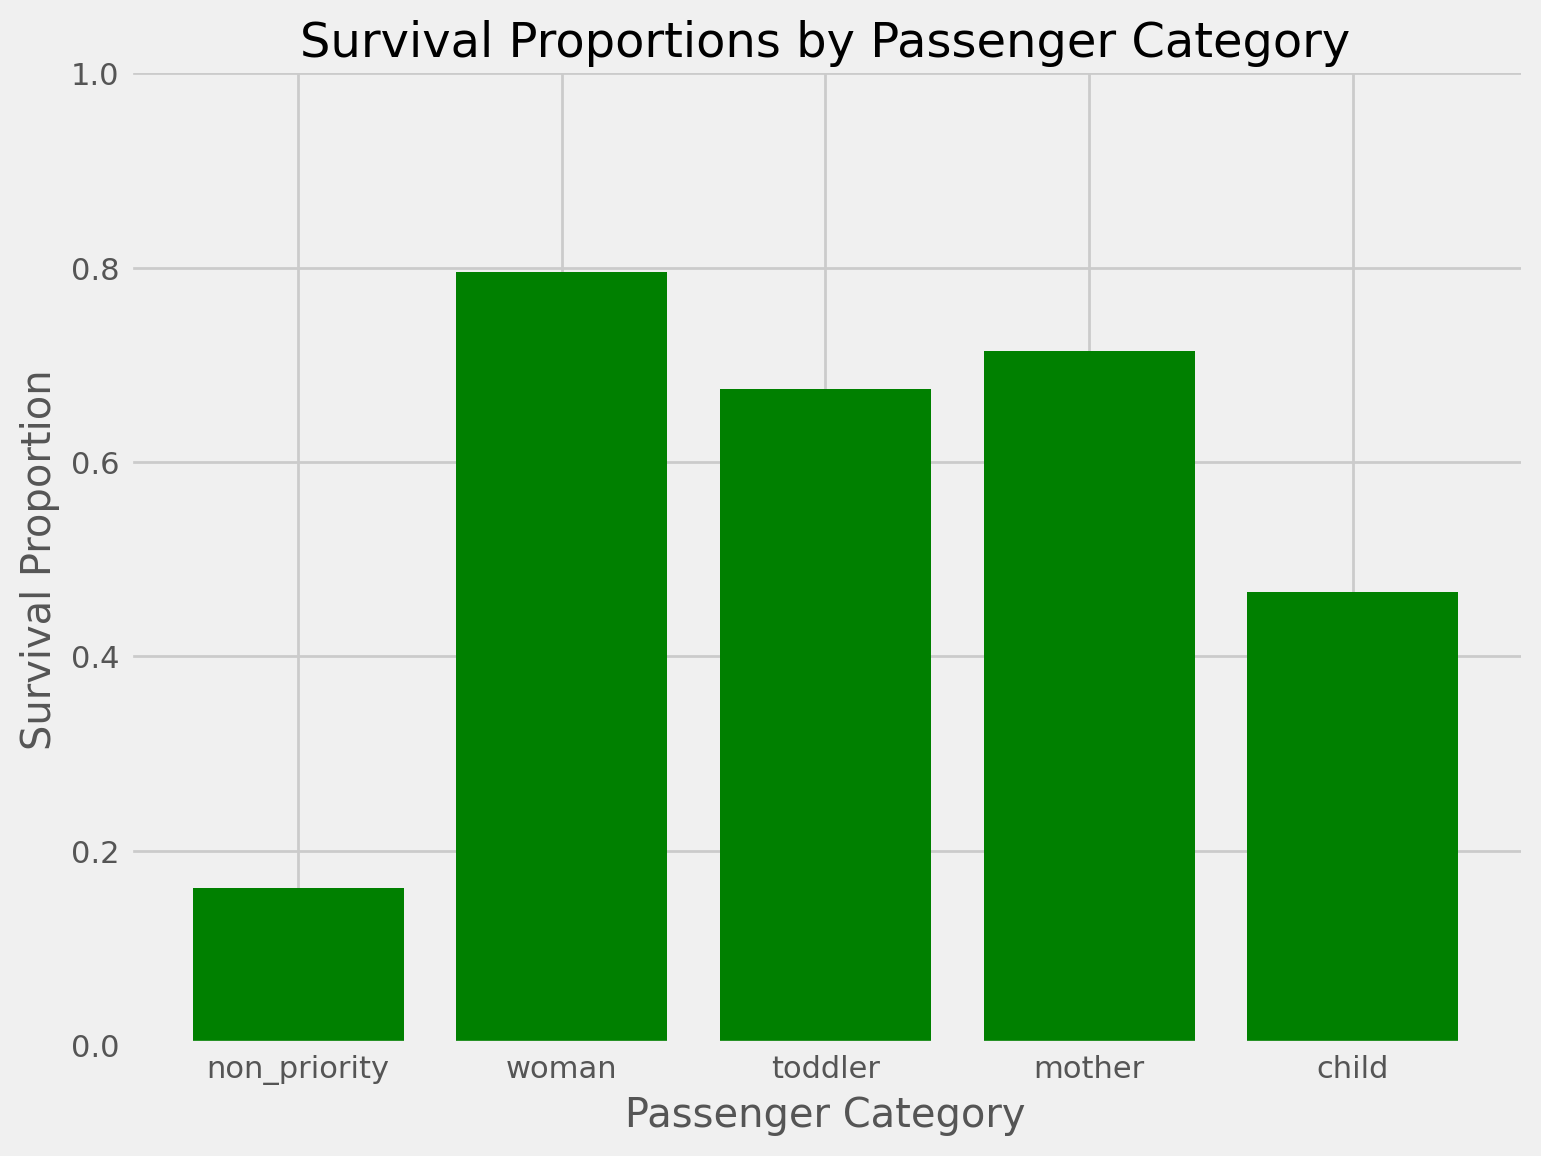

In [80]:

# Create a copy of the DataFrame to work with
inscope_df_copy = inscope_df.copy()

# Calculate survival proportions for each title category
survival_proportions = []

title_categories = ['non_priority', 'woman', 'toddler', 'mother', 'child']

for title in title_categories:
    total_passengers = len(inscope_df_copy[inscope_df_copy['Title'] == title])
    survived_passengers = len(inscope_df_copy[(inscope_df_copy['Title'] == title)
                                              & (inscope_df_copy['Survived'] == 1)])
    survival_proportion = survived_passengers / total_passengers if total_passengers != 0 else 0
    survival_proportions.append(survival_proportion)

# Plotting the bar plot for survival proportions
plt.figure(figsize=(8, 6))
plt.bar(title_categories, survival_proportions, color='green')
plt.title('Survival Proportions by Passenger Category')
plt.xlabel('Passenger Category')
plt.ylabel('Survival Proportion')
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1 for proportion
plt.show()


### Observations

- **Non-Priority:** Exhibits the lowest survival proportion (~0.19) among defined categories, indicating a substantially lower likelihood of survival.
- **Woman:** Shows the highest survival proportion (~0.8), signifying a significantly higher likelihood of survival.
- **Mother/Toddler:** Displays intermediate survival proportions (~0.5), suggesting a moderate likelihood of survival compared to other categories.
- **Child:** Demonstrates a survival proportion of about 0.42, signifying a relatively lower likelihood of survival than women.

These survival proportion disparities underscore adherence to the "women and children first" principle, indicating notably higher survival rates among women, mothers, toddlers, and children compared to non-priority passengers. This initial analysis supports the hypothesis that certain passenger categories were prioritized during the evacuation process.

### Children Ages

- **Toddlers (Age < 5):** Show a notably higher survival rate compared to children aged 5 to 14.
- **Children (Age 5-14):** Exhibit relatively lower survival rates compared to toddlers, suggesting potential differentiation in evacuation prioritization based on age within the children group.

This observation highlights a significant disparity in survival rates between toddlers and older children, potentially indicating a more pronounced adherence to prioritizing younger passengers, specifically toddlers, in accordance with the "women and children first" principle.


---

## Consolidating Passenger Categories: "Women and Mothers" for Enhanced Analysis
 

 

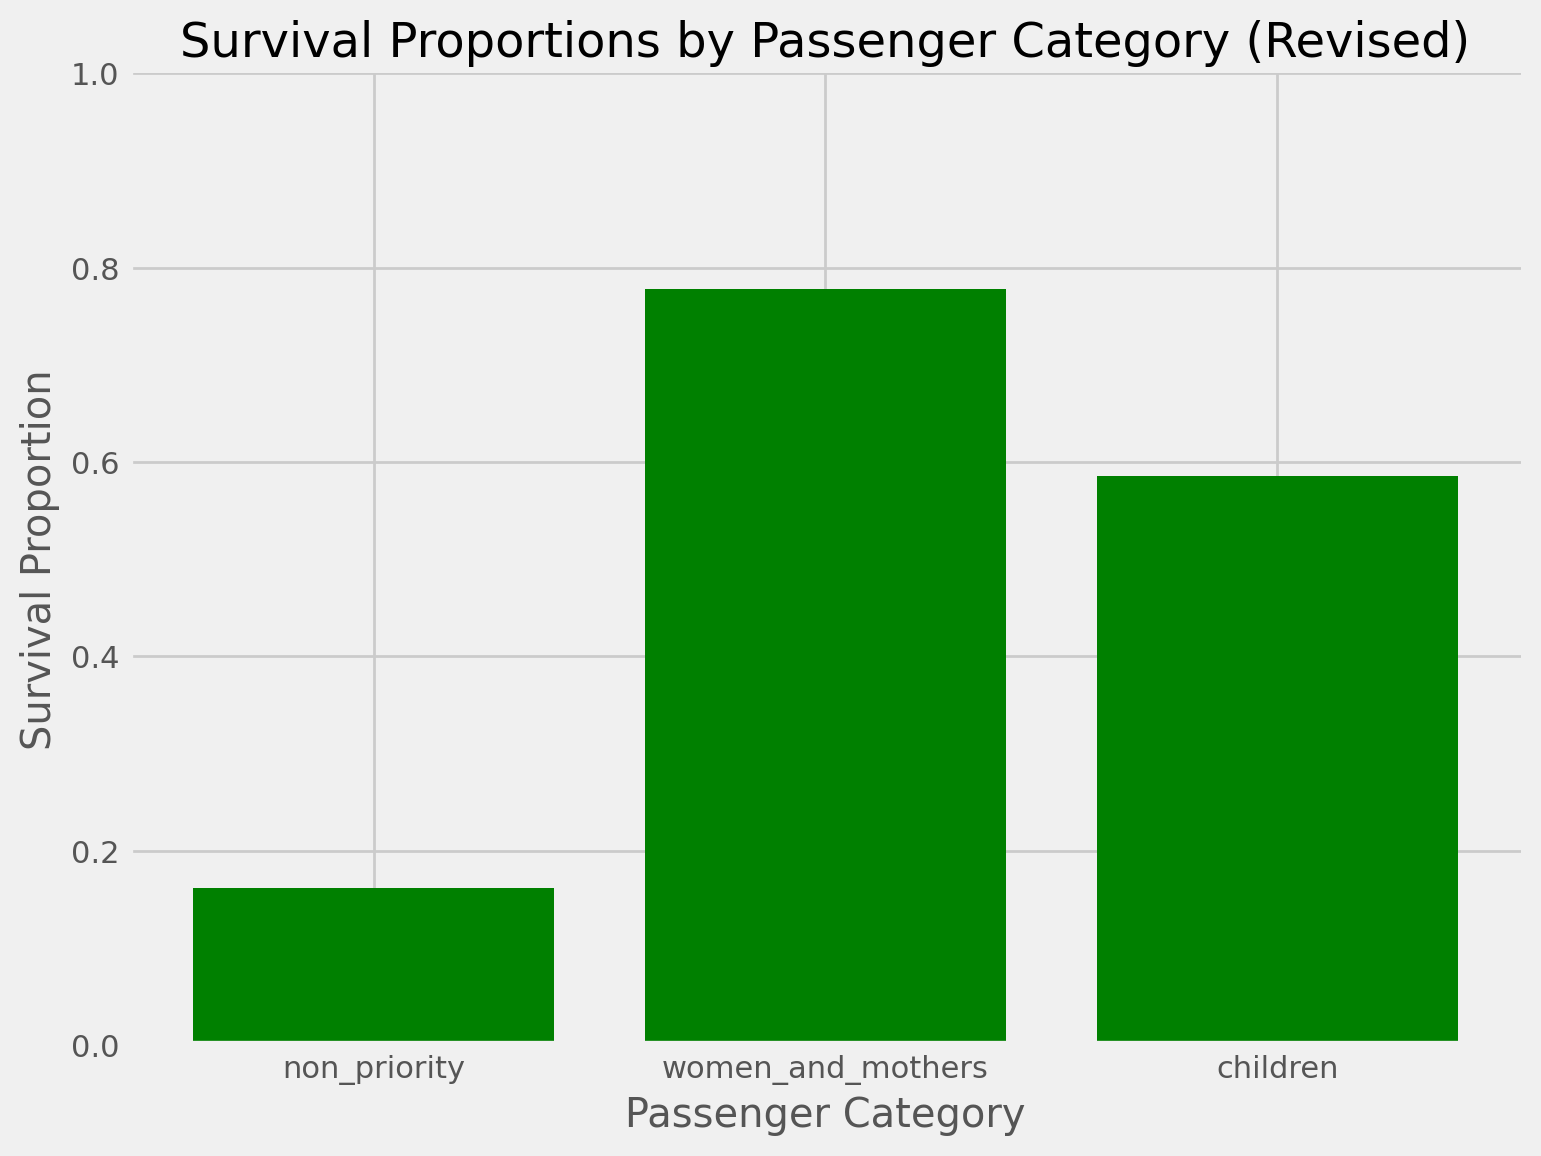

In [81]:
# Create a copy of the DataFrame to work with
new_df = inscope_df.copy()

# Combine 'women' and 'mothers' categories into a broader 'women_and_mothers' category
new_df.loc[new_df['Title'].isin(['woman', 'mother']), 'Title'] = 'women_and_mothers'

# Combine 'toddler' and 'child' categories into a broader 'children' category
new_df.loc[new_df['Title'].isin(['toddler', 'child']), 'Title'] = 'children'

# Calculate survival proportions for each revised title category
survival_proportions_combined = []

combined_categories = ['non_priority', 'women_and_mothers', 'children']

# Loop through each revised category and calculate survival proportions
for title in combined_categories:
    
        # Count total passengers in the current revised category
    total_passengers = len(new_df[new_df['Title'] == title])
    
        # Count passengers who survived within the current revised category
    survived_passengers = len(new_df[(new_df['Title'] == title) & (new_df['Survived'] == 1)])
    
        # Calculate survival proportion for the current category and append to the list
    survival_proportion = survived_passengers / total_passengers if total_passengers != 0 else 0
    survival_proportions_combined.append(survival_proportion)

# Plotting the bar plot for survival proportions after combining categories
plt.figure(figsize=(8, 6))
plt.bar(combined_categories, survival_proportions_combined, color='green')
plt.title('Survival Proportions by Passenger Category (Revised)')
plt.xlabel('Passenger Category')
plt.ylabel('Survival Proportion')
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1 for proportion
plt.show()




### Observations After Consolidation

- **Non-Priority Category (men):** Exhibits notably lower survival rates (~0.19) compared to other groups.
- **Women and Mothers Category:** Demonstrates notably higher survival rates (~0.79), aligning with the "women and children first" principle.
- **Children and Toddlers Category:** Displays a moderate survival rate (~0.59), suggesting a level of prioritization during evacuation, though not as pronounced as for women and mothers.

### Tentative Findings & Potential Insights

The exploration tentatively aligns with historical perceptions, indicating adherence to the "women and children first" principle during the Titanic disaster. Higher survival rates among these categories suggest a potential priority given to these groups, reflecting prevalent societal norms of that era.

---


## Quantitative Validation of Evacuation Prioritization


In [118]:
 new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  873 non-null    int64  
 1   Pclass       873 non-null    int64  
 2   Name         873 non-null    object 
 3   Sex          873 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        873 non-null    int64  
 6   Parch        873 non-null    int64  
 7   Survived     873 non-null    int64  
 8   Title        873 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 100.5+ KB


In [86]:
import statsmodels.api as sm
import pandas as pd

# Make a copy of the DataFrame
new_dfhot = new_df.copy().dropna()

# Perform one-hot encoding for 'Sex' and 'Title' variables
encoded_sex = pd.get_dummies(new_dfhot['Sex'], prefix='Sex', dtype=int)
encoded_title = pd.get_dummies(new_dfhot['Title'], prefix='Title',dtype=int)
 

# Select and drop one column from each encoded set to set as reference levels
# Choosing 'Sex_male' as reference for 'Sex'
encoded_sex = encoded_sex.drop(columns=['Sex_male'])
# encoded_age = new_dfhot['Age']
new_dfhot

# Choosing 'Title_non_priority' as reference for 'Title'
encoded_title = encoded_title.drop(columns=['Title_non_priority'])

# Combine the encoded columns with the original dataframe
new_dfhot = pd.concat([new_dfhot, encoded_sex, encoded_title], axis=1)

# Define the predictor variables (encoded columns) and the response variable (Survived)
predictors =encoded_title.columns.tolist()  # List of predictor variables
response = 'Survived'
 
# Fit logistic regression model
model = sm.Logit(new_dfhot[response], sm.add_constant(new_dfhot[predictors]))
result = model.fit()

# Display regression summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.506771
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Dec 2023   Pseudo R-squ.:                  0.2497
Time:                        20:22:35   Log-Likelihood:                -361.83
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.021e-53
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5502      0.129    -12.030      0.000      -1.803   

In [87]:
# Create a copy of the DataFrame
new_df_combined = new_df.copy()

# Combine 'women_and_mothers' and 'children' into one category 'women_and_children'
new_df_combined['Combined_Title'] = new_df_combined['Title'].map(lambda x: 1 if x in ['women_and_mothers', 'children'] else 0)

 
# Define the predictor variables (encoded columns) and the response variable (Survived)
predictors =['Combined_Title']  # List of predictor variables
response = 'Survived'
 
# Fit logistic regression model
model = sm.Logit(new_df_combined[response], sm.add_constant(new_df_combined[predictors]))
result = model.fit()

# Display regression summary
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.493813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  873
Model:                          Logit   Df Residuals:                      871
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Dec 2023   Pseudo R-squ.:                  0.2584
Time:                        20:22:53   Log-Likelihood:                -431.10
converged:                       True   LL-Null:                       -581.30
Covariance Type:            nonrobust   LLR p-value:                 2.698e-67
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6433      0.117    -14.032      0.000      -1.873      -1.414
Combined_Title   

 
 
## Regression Summary




The logistic regression model showcases distinctive coefficients associated with different passenger categories, emphasizing the substantial impact of being categorized as part of the combined women and children group on the likelihood of survival compared to other categories.



### Model 1:
- **Function Value:** 0.506771
- **Iterations:** 5
- **Observations:** 714
- **Dependent Variable:** Survived

#### Logit Regression Results:
- **Constant (const):** -1.5502
- **Title_children coefficient:** 1.8965 (p-value < 0.001)
- **Title_women_and_mothers coefficient:** 2.7888 (p-value < 0.001)
- **Pseudo R-squared:** 0.2497

### Model 2:
- **Function Value:** 0.493813
- **Iterations:** 6
- **Observations:** 873
- **Dependent Variable:** Survived

#### Logit Regression Results:
- **Constant (const):** -1.6433
- **Combined_Title coefficient:** 2.6794 (p-value < 0.001)
- **Pseudo R-squared:** 0.2584

Both models have converged successfully and exhibit statistically significant coefficients for the predictors. Model 1 includes separate predictors for 'Title_children' and 'Title_women_and_mothers,' each showing significant positive coefficients, suggesting a substantial impact on survival probabilities. Model 2 utilizes a combined title predictor ('Combined_Title'), showing a similar significant positive coefficient associated with higher survival probabilities. The Pseudo R-squared values indicate a moderate degree of explained variation by the predictors in both models, with Model 2 showing slightly higher explanatory power.

These results indicate that both individual and combined title categories have a strong association with survival probabilities among the passengers aboard the Titanic.

---



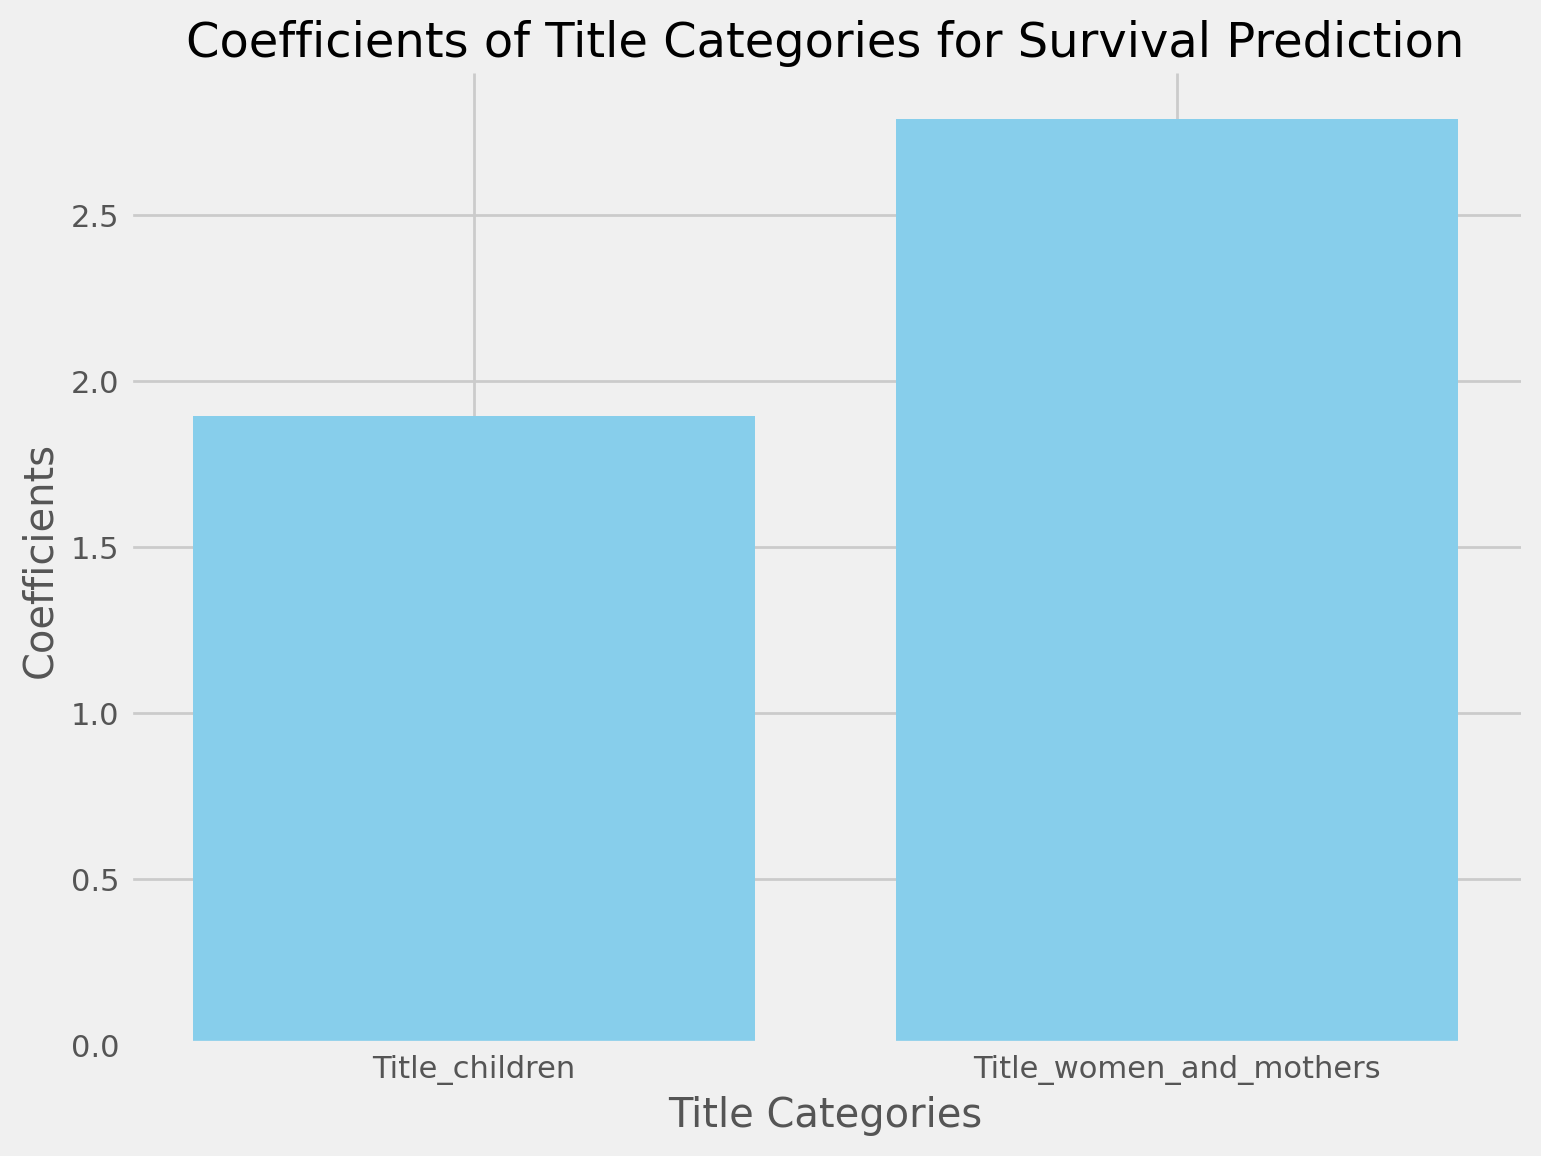

In [186]:

# Coefficients from the logistic regression model
coefficients = [1.8965, 2.7888]  # Update with your actual coefficients

# Labels for each category
labels = ['Title_children', 'Title_women_and_mothers']  # Update with your category names

# Plotting the coefficients
plt.figure(figsize=(8, 6))
plt.bar(labels, coefficients, color='green')
plt.title('Coefficients of Title Categories for Survival Prediction')
plt.xlabel('Title Categories')
plt.ylabel('Coefficients')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Adding a reference line at 0
plt.show()


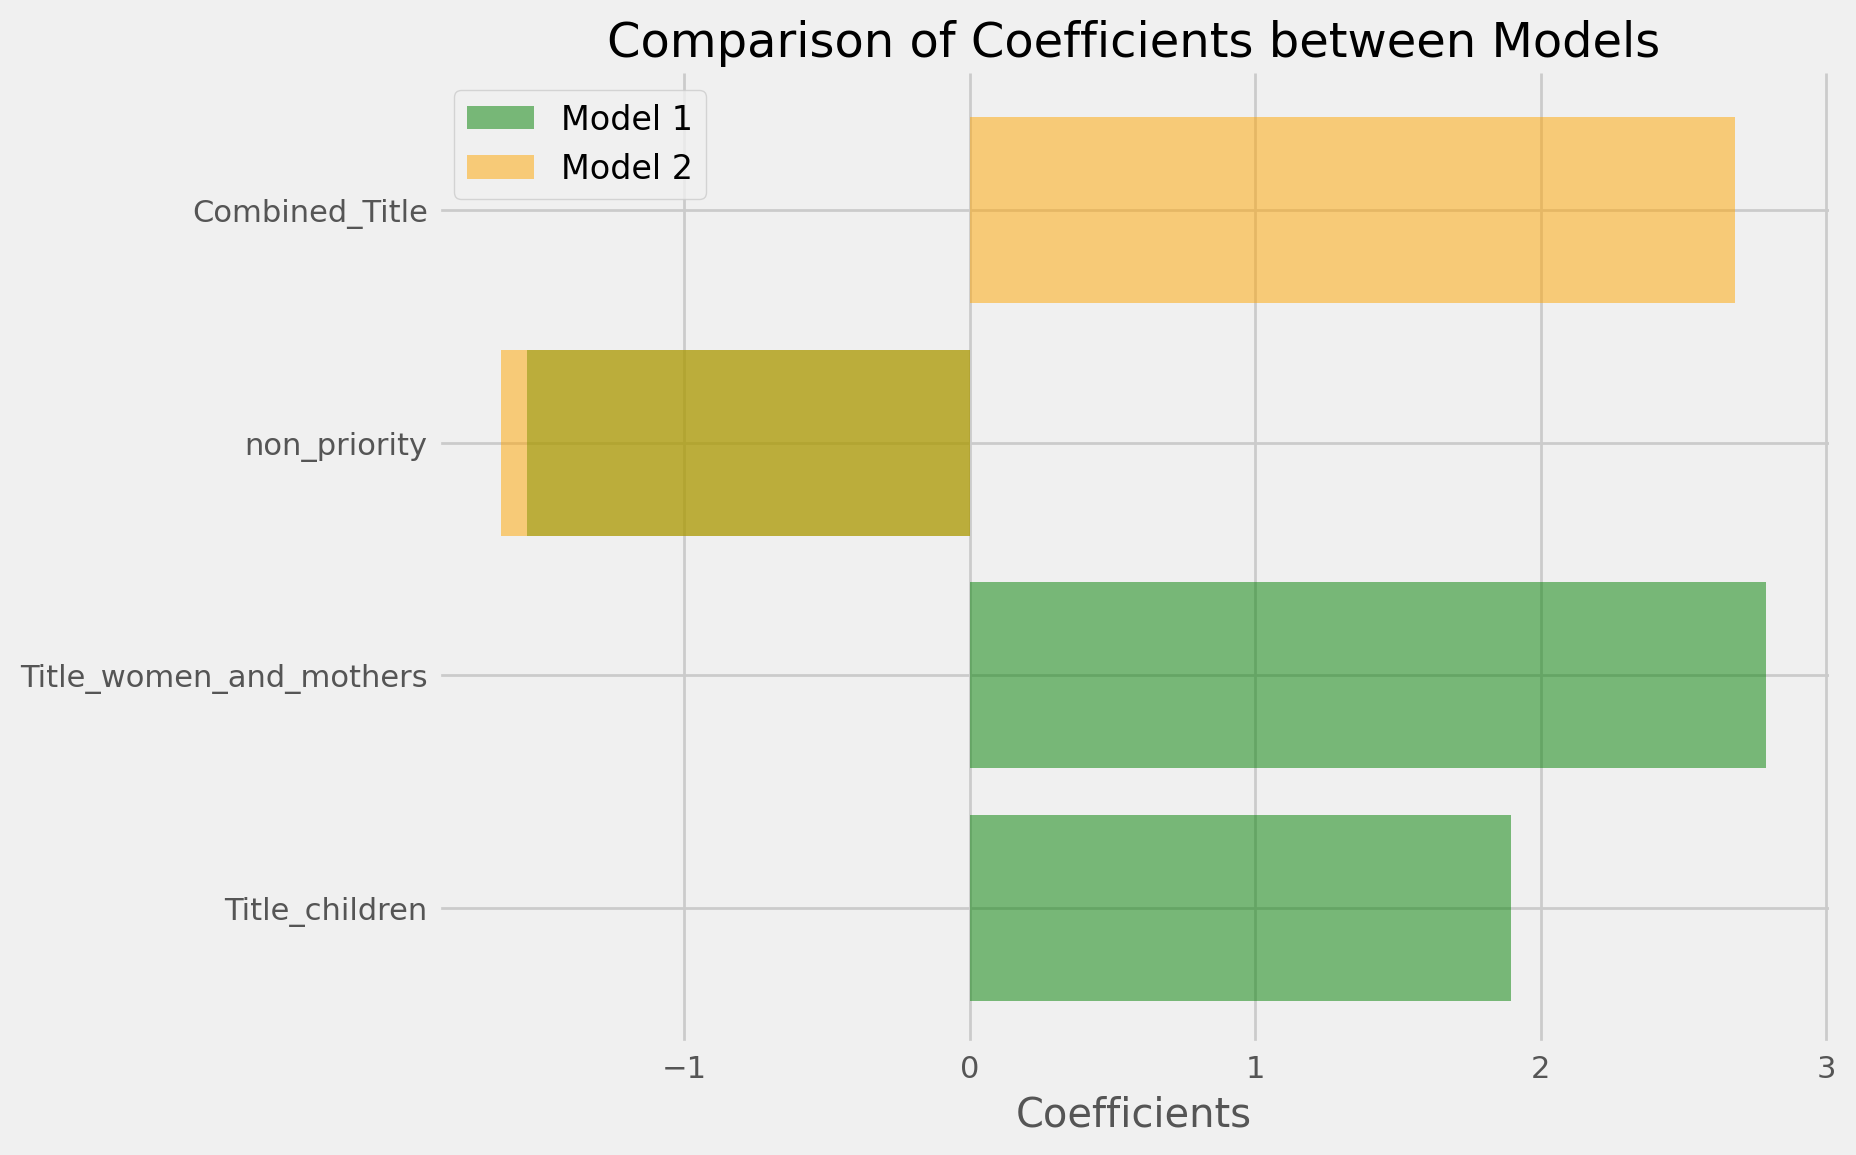

In [88]:

# Coefficients for the first model
coef_1 = {'Title_children': 1.8965, 'Title_women_and_mothers': 2.7888, 'non_priority': -1.5502}

# Coefficients for the second model
coef_2 = {'Combined_Title': 2.6794, 'non_priority': -1.6433}

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting coefficients from the first model
for i, (category, coef) in enumerate(coef_1.items()):
    ax.barh(category, coef, color='green', alpha=0.5, label='Model 1' if i == 0 else '')

# Plotting coefficient from the second model
for i, (category, coef) in enumerate(coef_2.items()):
    ax.barh(category, coef, color='orange', alpha=0.5, label='Model 2' if i == 0 else '')

ax.set_xlabel('Coefficients')
ax.set_title('Comparison of Coefficients between Models')
ax.legend()
plt.show()


 
## Results Explanation:
The logistic regression results reveal distinctive coefficients associated with different title categories. In the first model focusing on `Title_children` and `Title_women_and_mothers`, the coefficients are 1.8965 and 2.7888, respectively. These coefficients represent the impact of being categorized as a child or a woman/mother on the likelihood of survival concerning the reference category.

The second model emphasizes a combined category, `Combined_Title`, against `non_priority`. The coefficient of 2.6794 for the  `Combined_Title` in the logistic regression model indicates a substantial impact on the likelihood of survival when categorized as part of the combined group encompassing women and children. This coefficient value represents the log-odds ratio between this specific category and the reference category, `non-priority`. A higher coefficient signifies a significantly higher probability of survival for individuals belonging to the combined category compared to those categorized as `non-priority` passengers.

## Conclusion:
The analysis demonstrates a considerable disparity in survival likelihood among different groups. Specifically, being identified as part of the combined category of women and children significantly increases the chances of survival compared to individuals categorized differently, such as non-priority. Moreover, the results underscore the importance of considering demographic categories in understanding survival rates among passengers during the studied event.

These findings highlight the significance of the categorization used in the study. They strongly suggest that women and children had notably higher survival probabilities compared to other passenger categories, particularly non-priority individuals. This insight adds valuable context to our understanding of the factors influencing survival rates and contributes to the broader study of survival dynamics in such scenarios.

--- 

# 5


 

# Chapter 5: Conclusion

The analysis concentrated on demographic categories, particularly women and children, revealing compelling insights into survival rates within these groups aboard the Titanic. The findings emphasize the significantly higher survival rates of the combined category of women and children compared to non-priority individuals. Further segmentation within this group highlighted the notably elevated survival rates of women and mothers, followed by children and toddlers.

## Insights

#### Higher Survival Rates for Women and Mothers:

- **Priority to Women and Mothers:** The women and mothers, as part of the women and children category, exhibited markedly higher survival rates compared to other groups, highlighting the priority accorded to this category during the crisis.

#### Distinct Survival Rates among Age Groups:

- **Variations in Age-Based Priorities:** Within the combined category, different age groups showed varying survival rates, notably higher among women and mothers compared to toddlers and children. This suggests potential differences in prioritization based on age distinctions within the demographic category.

## Suggestions

#### Enhanced Focus on Maternal Care:

- **Importance of Maternal Support:** Understanding the higher survival rates among women and mothers could prompt further studies or policies focusing on maternal care and support during emergencies or disasters.

#### Refinement in Age-Based Prioritization:

- **Reevaluating Age-Based Priorities:** Exploring the distinct survival rates among different age groups within women and children might lead to a reevaluation of age-based priorities during rescue operations.

## Possible Next Steps

#### Temporal Analysis:

- **Understanding Evolving Priorities:** Exploring survival trends over time or during specific phases of the disaster could provide insight into changing priorities or policies during critical moments.

These suggested avenues for further investigation hold the potential to enrich the depth and breadth of the analysis, offering additional insights into the survival dynamics of vulnerable groups during exigencies.

---

